# Introduction

We have collected our data from (1) - https://oracleselixir.com/tools/downloads, we have downloaded 4 datasets as CSV format for 4 consecutive years: 2020,2021,2022 and 2023 for League of of Legends profesional games played.

In our project we are going to talk about, League of Legends Winning Team Analysis & Game Prediction.

In [156]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

---
### Load The Data

In [157]:
# loading our 3 data sets
df_20 = pd.read_csv("2020_LoL_esports.csv")
df_21 = pd.read_csv("2021_LoL_esports.csv")
df_22 = pd.read_csv("2022_LoL_esports.csv")
df_23 = pd.read_csv("2023_LOL_esports.csv")


In [158]:
# display our dataset
df_21.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1.0,10.25,...,118.0,748.0,-56.0,-4.0,2.0,0.0,1.0,0.0,1.0,1.0
1,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1.0,10.25,...,84.0,2120.0,3405.0,62.0,3.0,2.0,0.0,2.0,0.0,3.0
2,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1.0,10.25,...,143.0,1578.0,354.0,15.0,2.0,3.0,0.0,0.0,0.0,0.0
3,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1.0,10.25,...,120.0,124.0,102.0,10.0,0.0,4.0,2.0,1.0,1.0,2.0
4,ESPORTSTMNT03/1632489,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2021,NaN,0,2021-01-02 07:40:39,1.0,10.25,...,25.0,448.0,450.0,3.0,1.0,4.0,0.0,0.0,2.0,2.0


In [159]:
# display our dataset
df_22.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT01_2690210,complete,NaN,LCKC,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,121.0,391.0,345.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0
1,ESPORTSTMNT01_2690210,complete,NaN,LCKC,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,100.0,541.0,-275.0,-11.0,2.0,3.0,2.0,0.0,5.0,1.0
2,ESPORTSTMNT01_2690210,complete,NaN,LCKC,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,119.0,-475.0,153.0,1.0,0.0,3.0,0.0,3.0,3.0,2.0
3,ESPORTSTMNT01_2690210,complete,NaN,LCKC,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,149.0,-793.0,-1343.0,-34.0,2.0,1.0,2.0,3.0,3.0,0.0
4,ESPORTSTMNT01_2690210,complete,NaN,LCKC,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,21.0,443.0,-497.0,7.0,1.0,2.0,2.0,0.0,6.0,2.0


In [160]:
df_20.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1,9.24,...,118.0,165.0,166.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1,9.24,...,98.0,-399.0,150.0,-7.0,0.0,0.0,0.0,1.0,0.0,0.0
2,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1,9.24,...,140.0,-409.0,-1837.0,-11.0,0.0,0.0,1.0,0.0,1.0,0.0
3,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1,9.24,...,135.0,51.0,-401.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1,9.24,...,28.0,-233.0,257.0,-8.0,0.0,0.0,0.0,0.0,1.0,0.0


In [161]:
df_23.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,131.0,322.0,263.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,117.0,-357.0,-1323.0,-43.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,162.0,-479.0,-324.0,-26.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,122.0,200.0,292.0,20.0,0.0,0.0,0.0,1.0,0.0,0.0
4,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,3.0,-216.0,-579.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [162]:
df_22.shape


(149400, 123)

In [163]:
df_21.shape

(149808, 123)

In [164]:
df_20.shape

(117552, 123)

In [165]:
df_23.shape

(130176, 123)

In [166]:
# Checking for duplicates
df_21.duplicated().sum()

0

In [167]:
# Checking for duplicates
df_22.duplicated().sum()

0

In [168]:
df_23.duplicated().sum()

0

In [169]:
# Checking for duplicates
df_20.duplicated().sum()

0


Looks like our data is in pretty good shape – no duplicates, and all three datasets have the exact same number of features. They're big, with over 100,000 rows each.

Since everything checks out, we're gonna put all the data together into one dataset.

### Merging Our Datas

In [170]:
# Merging our Datas
lol_df = pd.concat([df_20, df_21, df_22, df_23], axis=0)
lol_df

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1.0,9.24,...,118.0,165.0,166.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1.0,9.24,...,98.0,-399.0,150.0,-7.0,0.0,0.0,0.0,1.0,0.0,0.0
2,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1.0,9.24,...,140.0,-409.0,-1837.0,-11.0,0.0,0.0,1.0,0.0,1.0,0.0
3,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1.0,9.24,...,135.0,51.0,-401.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1.0,9.24,...,28.0,-233.0,257.0,-8.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130171,ESPORTSTMNT01_3438678,complete,NaN,NEXO,2024,Split 1,0,2023-11-20 19:59:21,2.0,13.22,...,135.0,131.0,66.0,4.0,1.0,0.0,0.0,1.0,2.0,0.0
130172,ESPORTSTMNT01_3438678,complete,NaN,NEXO,2024,Split 1,0,2023-11-20 19:59:21,2.0,13.22,...,129.0,-381.0,1106.0,13.0,0.0,0.0,1.0,3.0,0.0,1.0
130173,ESPORTSTMNT01_3438678,complete,NaN,NEXO,2024,Split 1,0,2023-11-20 19:59:21,2.0,13.22,...,27.0,-142.0,-769.0,-6.0,0.0,0.0,1.0,0.0,3.0,0.0
130174,ESPORTSTMNT01_3438678,complete,NaN,NEXO,2024,Split 1,0,2023-11-20 19:59:21,2.0,13.22,...,515.0,-660.0,-1568.0,-34.0,4.0,7.0,2.0,2.0,0.0,4.0


In [171]:
lol_df.shape

(546936, 123)

After merging our datasets into one dataframe we end up with 546,936 rows and a total of 123 features.



In [172]:
# dropping partial rows
index_names = lol_df[lol_df['datacompleteness'] == 'partial'].index


In [173]:
lol_df.drop(index_names, inplace = True)


In [174]:
index_names_1 = lol_df[lol_df['position'] != 'team'].index

In [175]:
lol_df.drop(index_names_1, inplace = True)

In [176]:
lol_df.shape

(60344, 123)

In [177]:
# Listing name of our features
lol_df.columns[lol_df.any()].tolist()

['gameid',
 'datacompleteness',
 'url',
 'league',
 'year',
 'split',
 'playoffs',
 'date',
 'game',
 'patch',
 'participantid',
 'side',
 'position',
 'teamname',
 'teamid',
 'ban1',
 'ban2',
 'ban3',
 'ban4',
 'ban5',
 'gamelength',
 'result',
 'kills',
 'deaths',
 'assists',
 'teamkills',
 'teamdeaths',
 'doublekills',
 'triplekills',
 'quadrakills',
 'pentakills',
 'firstblood',
 'team kpm',
 'ckpm',
 'firstdragon',
 'dragons',
 'opp_dragons',
 'elementaldrakes',
 'opp_elementaldrakes',
 'infernals',
 'mountains',
 'clouds',
 'oceans',
 'chemtechs',
 'hextechs',
 'dragons (type unknown)',
 'elders',
 'opp_elders',
 'firstherald',
 'heralds',
 'opp_heralds',
 'firstbaron',
 'barons',
 'opp_barons',
 'firsttower',
 'towers',
 'opp_towers',
 'firstmidtower',
 'firsttothreetowers',
 'turretplates',
 'opp_turretplates',
 'inhibitors',
 'opp_inhibitors',
 'damagetochampions',
 'dpm',
 'damagetakenperminute',
 'damagemitigatedperminute',
 'wardsplaced',
 'wpm',
 'wardskilled',
 'wcpm',
 '

In [178]:
# dropping the columns which we dont need
lol_df.drop(['total cs','earnedgoldshare','damageshare','deathsat15','deathsat10','teamdeaths','url','date','gamelength','doublekills','split', 'champion','gameid','game', 'patch','triplekills','quadrakills','pentakills', 'participantid','playername', 'playerid', 'split', 'teamid', 'champion','ban1','ban2', 'ban3', 'ban4', 'ban5','opp_dragons','opp_elementaldrakes', 'opp_elders','opp_heralds', 'opp_barons', 'opp_towers', 'opp_turretplates', 'opp_inhibitors', 'opp_goldat10','opp_xpat10','opp_csat10', 'opp_killsat10','opp_assistsat10','opp_deathsat10', 'opp_killsat15','opp_goldat15','opp_xpat15','opp_csat15','opp_assistsat15','opp_deathsat15','ckpm','monsterkillsenemyjungle','monsterkillsownjungle','league','playoffs','dpm','damagetochampions','gspd','vspm','visionscore','wpm','wardskilled','wcpm','wardsplaced','damagemitigatedperminute','damagetakenperminute','deaths','year','firstbloodassist','firstbloodvictim','firstbloodkill',  'team kpm', 'elementaldrakes','datacompleteness','position'  ], axis=1, inplace = True)

In [179]:
lol_df.shape

(60344, 51)

Please note once we merged and dropped the names of the players per team, we noticed that the size of our data significantly dropped to 53972 rows from 416,760 rows;
We are analyzing the game based on two topics;

1. Gold earned on the first 15 minutes of a match
2. Secondary objectives in the game(turrets, dragons and etc...)

Therefore we dropped columns that were not answering or providing us any information about the questions above, or that could possibly dominate other columns once we start building our models.

In [180]:
lol_df.columns

Index(['side', 'teamname', 'result', 'kills', 'assists', 'teamkills',
       'firstblood', 'firstdragon', 'dragons', 'infernals', 'mountains',
       'clouds', 'oceans', 'chemtechs', 'hextechs', 'dragons (type unknown)',
       'elders', 'firstherald', 'heralds', 'firstbaron', 'barons',
       'firsttower', 'towers', 'firstmidtower', 'firsttothreetowers',
       'turretplates', 'inhibitors', 'controlwardsbought', 'totalgold',
       'earnedgold', 'earned gpm', 'goldspent', 'minionkills', 'monsterkills',
       'cspm', 'goldat10', 'xpat10', 'csat10', 'golddiffat10', 'xpdiffat10',
       'csdiffat10', 'killsat10', 'assistsat10', 'goldat15', 'xpat15',
       'csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15',
       'assistsat15'],
      dtype='object')

In [181]:
#  listing columns we have
lol_df.columns[lol_df.any()].tolist()

['side',
 'teamname',
 'result',
 'kills',
 'assists',
 'teamkills',
 'firstblood',
 'firstdragon',
 'dragons',
 'infernals',
 'mountains',
 'clouds',
 'oceans',
 'chemtechs',
 'hextechs',
 'dragons (type unknown)',
 'elders',
 'firstherald',
 'heralds',
 'firstbaron',
 'barons',
 'firsttower',
 'towers',
 'firstmidtower',
 'firsttothreetowers',
 'turretplates',
 'inhibitors',
 'controlwardsbought',
 'totalgold',
 'earnedgold',
 'earned gpm',
 'goldspent',
 'minionkills',
 'monsterkills',
 'cspm',
 'goldat10',
 'xpat10',
 'csat10',
 'golddiffat10',
 'xpdiffat10',
 'csdiffat10',
 'killsat10',
 'assistsat10',
 'goldat15',
 'xpat15',
 'csat15',
 'golddiffat15',
 'xpdiffat15',
 'csdiffat15',
 'killsat15',
 'assistsat15']

In [182]:
lol_df.head()

,side,teamname,result,kills,assists,teamkills,firstblood,firstdragon,dragons,infernals,...,killsat10,assistsat10,goldat15,xpat15,csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15
10,Blue,Liiv SANDBOX,1,17,33,17,0.0,0.0,2.0,0.0,...,0.0,0.0,21953.0,27219.0,507.0,-825.0,-1665.0,-12.0,0.0,0.0
11,Red,T1,0,11,25,11,1.0,1.0,3.0,1.0,...,0.0,0.0,22778.0,28884.0,519.0,825.0,1665.0,12.0,1.0,2.0
22,Blue,T1,0,5,16,5,0.0,0.0,1.0,0.0,...,0.0,0.0,21714.0,26869.0,501.0,-5484.0,-4833.0,-56.0,0.0,0.0
23,Red,Liiv SANDBOX,1,21,41,21,1.0,1.0,4.0,0.0,...,3.0,3.0,27198.0,31702.0,557.0,5484.0,4833.0,56.0,6.0,7.0
46,Blue,T1,0,4,8,4,0.0,1.0,2.0,0.0,...,0.0,0.0,22329.0,26093.0,465.0,-2471.0,-3064.0,-70.0,2.0,3.0


In [183]:
# Checking for null values
lol_df.isna().sum()

side                          0
teamname                     27
result                        0
kills                         0
assists                       0
teamkills                     0
firstblood                   14
firstdragon                   4
dragons                      56
infernals                    56
mountains                    56
clouds                       56
oceans                       56
chemtechs                 26846
hextechs                  26846
dragons (type unknown)    57851
elders                       56
firstherald                   0
heralds                    2038
firstbaron                  290
barons                        0
firsttower                   14
towers                        0
firstmidtower                16
firsttothreetowers            0
turretplates              26846
inhibitors                   62
controlwardsbought           14
totalgold                     0
earnedgold                   14
earned gpm                   14
goldspen

In [184]:
# Dropping null value rows
lol_df.dropna( how='any',subset=['teamname', 'golddiffat15', 'assistsat15', 'csdiffat15', 'killsat15', 'xpdiffat15','csat15','xpat15','goldat15','earnedgold','earned gpm','firstblood'], inplace = True)

In [185]:
# Sanity Check
lol_df.isna().sum()

side                          0
teamname                      0
result                        0
kills                         0
assists                       0
teamkills                     0
firstblood                    0
firstdragon                   4
dragons                      56
infernals                    56
mountains                    56
clouds                       56
oceans                       56
chemtechs                 26832
hextechs                  26832
dragons (type unknown)    57824
elders                       56
firstherald                   0
heralds                    2024
firstbaron                  288
barons                        0
firsttower                    0
towers                        0
firstmidtower                16
firsttothreetowers            0
turretplates              26832
inhibitors                   62
controlwardsbought            0
totalgold                     0
earnedgold                    0
earned gpm                    0
goldspen

In [186]:
# filling null values with 0
lol_df=lol_df.fillna(0)

In [187]:
# Sanity Check
lol_df.isna().sum()

side                      0
teamname                  0
result                    0
kills                     0
assists                   0
teamkills                 0
firstblood                0
firstdragon               0
dragons                   0
infernals                 0
mountains                 0
clouds                    0
oceans                    0
chemtechs                 0
hextechs                  0
dragons (type unknown)    0
elders                    0
firstherald               0
heralds                   0
firstbaron                0
barons                    0
firsttower                0
towers                    0
firstmidtower             0
firsttothreetowers        0
turretplates              0
inhibitors                0
controlwardsbought        0
totalgold                 0
earnedgold                0
earned gpm                0
goldspent                 0
minionkills               0
monsterkills              0
cspm                      0
goldat10            

In [188]:
lol_df.info

<bound method DataFrame.info of         side        teamname  result  kills  assists  teamkills  firstblood  \
10      Blue    Liiv SANDBOX       1     17       33         17         0.0   
11       Red              T1       0     11       25         11         1.0   
22      Blue              T1       0      5       16          5         0.0   
23       Red    Liiv SANDBOX       1     21       41         21         1.0   
46      Blue              T1       0      4        8          4         0.0   
...      ...             ...     ...    ...      ...        ...         ...   
130151   Red        Dango SB       0     15       50         15         0.0   
130162  Blue    Kawaii Kiwis       1     21       48         21         1.0   
130163   Red  Erfolg Esports       0     17       36         17         0.0   
130174  Blue    Kawaii Kiwis       1     25       45         25         1.0   
130175   Red  Erfolg Esports       0     20       44         20         0.0   

        firstdragon

In [189]:
lol_df.describe

<bound method NDFrame.describe of         side        teamname  result  kills  assists  teamkills  firstblood  \
10      Blue    Liiv SANDBOX       1     17       33         17         0.0   
11       Red              T1       0     11       25         11         1.0   
22      Blue              T1       0      5       16          5         0.0   
23       Red    Liiv SANDBOX       1     21       41         21         1.0   
46      Blue              T1       0      4        8          4         0.0   
...      ...             ...     ...    ...      ...        ...         ...   
130151   Red        Dango SB       0     15       50         15         0.0   
130162  Blue    Kawaii Kiwis       1     21       48         21         1.0   
130163   Red  Erfolg Esports       0     17       36         17         0.0   
130174  Blue    Kawaii Kiwis       1     25       45         25         1.0   
130175   Red  Erfolg Esports       0     20       44         20         0.0   

        firstdrag

In [190]:
lol_df.describe()

,result,kills,assists,teamkills,firstblood,firstdragon,dragons,infernals,mountains,clouds,...,killsat10,assistsat10,goldat15,xpat15,csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15
count,60303.000000,60303.000000,60303.000000,60303.000000,60303.000000,60303.000000,60303.000000,60303.000000,60303.000000,60303.000000,...,60303.000000,60303.000000,60303.000000,60303.000000,60303.000000,60303.000000,60303.000000,60303.000000,60303.000000,60303.000000
mean,0.499959,14.431454,32.331260,14.431454,0.499660,0.499942,2.254034,0.479081,0.474272,0.475980,...,2.212742,3.414556,24748.527403,29319.871648,500.126047,-0.088984,0.030430,-0.000348,4.141469,6.877203
std,0.500004,7.588316,18.173399,7.588316,0.500004,0.500004,1.404574,0.727365,0.724171,0.725854,...,1.953065,3.497654,1915.174675,1485.566149,37.982933,3140.650386,2114.713435,41.773700,3.022634,5.512836
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,18003.000000,20358.000000,289.000000,-17056.000000,-11914.000000,-237.000000,0.000000,0.000000
25%,0.000000,8.000000,17.000000,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,23399.500000,28371.000000,476.000000,-1971.000000,-1298.000000,-27.000000,2.000000,3.000000
50%,0.000000,14.000000,32.000000,14.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,24523.000000,29367.000000,502.000000,0.000000,0.000000,0.000000,4.000000,6.000000
75%,1.000000,20.000000,45.000000,20.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,...,3.000000,5.000000,25840.500000,30297.000000,527.000000,1971.000000,1299.000000,27.000000,6.000000,10.000000
max,1.000000,58.000000,117.000000,58.000000,1.000000,1.000000,7.000000,4.000000,4.000000,4.000000,...,19.000000,35.000000,39960.000000,36028.000000,628.000000,17056.000000,11914.000000,237.000000,32.000000,50.000000


In [191]:
lol_df.dtypes

side                       object
teamname                   object
result                      int64
kills                       int64
assists                     int64
teamkills                   int64
firstblood                float64
firstdragon               float64
dragons                   float64
infernals                 float64
mountains                 float64
clouds                    float64
oceans                    float64
chemtechs                 float64
hextechs                  float64
dragons (type unknown)    float64
elders                    float64
firstherald               float64
heralds                   float64
firstbaron                float64
barons                    float64
firsttower                float64
towers                    float64
firstmidtower             float64
firsttothreetowers        float64
turretplates              float64
inhibitors                float64
controlwardsbought        float64
totalgold                   int64
earnedgold    

In [192]:
# reset our index
lol_df = lol_df.sort_values(by=[]).reset_index().drop('index', axis=1)
lol_df

,side,teamname,result,kills,assists,teamkills,firstblood,firstdragon,dragons,infernals,...,killsat10,assistsat10,goldat15,xpat15,csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15
0,Blue,Liiv SANDBOX,1,17,33,17,0.0,0.0,2.0,0.0,...,0.0,0.0,21953.0,27219.0,507.0,-825.0,-1665.0,-12.0,0.0,0.0
1,Red,T1,0,11,25,11,1.0,1.0,3.0,1.0,...,0.0,0.0,22778.0,28884.0,519.0,825.0,1665.0,12.0,1.0,2.0
2,Blue,T1,0,5,16,5,0.0,0.0,1.0,0.0,...,0.0,0.0,21714.0,26869.0,501.0,-5484.0,-4833.0,-56.0,0.0,0.0
3,Red,Liiv SANDBOX,1,21,41,21,1.0,1.0,4.0,0.0,...,3.0,3.0,27198.0,31702.0,557.0,5484.0,4833.0,56.0,6.0,7.0
4,Blue,T1,0,4,8,4,0.0,1.0,2.0,0.0,...,0.0,0.0,22329.0,26093.0,465.0,-2471.0,-3064.0,-70.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60298,Red,Dango SB,0,15,50,15,0.0,1.0,3.0,2.0,...,3.0,11.0,24031.0,30006.0,540.0,31.0,1299.0,19.0,4.0,13.0
60299,Blue,Kawaii Kiwis,1,21,48,21,1.0,1.0,3.0,0.0,...,3.0,4.0,23720.0,28871.0,515.0,-75.0,545.0,54.0,3.0,4.0
60300,Red,Erfolg Esports,0,17,36,17,0.0,0.0,1.0,0.0,...,1.0,3.0,23795.0,28326.0,461.0,75.0,-545.0,-54.0,5.0,9.0
60301,Blue,Kawaii Kiwis,1,25,45,25,1.0,0.0,2.0,1.0,...,1.0,2.0,23356.0,28430.0,481.0,-660.0,-1568.0,-34.0,4.0,7.0


In [193]:
# Creating our second data frame for golds and EXP
lol2_df = lol_df.drop(['dragons','side','firstdragon','dragons','infernals','mountains','clouds','oceans','chemtechs','hextechs','dragons (type unknown)','elders','firstherald','heralds','firstbaron','barons','firsttower','towers','firstmidtower','firsttothreetowers','turretplates','inhibitors','controlwardsbought',], axis=1)

In [194]:
lol2_df

,teamname,result,kills,assists,teamkills,firstblood,totalgold,earnedgold,earned gpm,goldspent,...,killsat10,assistsat10,goldat15,xpat15,csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15
0,Liiv SANDBOX,1,17,33,17,0.0,68927,44905.0,1213.6486,62275.0,...,0.0,0.0,21953.0,27219.0,507.0,-825.0,-1665.0,-12.0,0.0,0.0
1,T1,0,11,25,11,1.0,62709,38687.0,1045.5946,62025.0,...,0.0,0.0,22778.0,28884.0,519.0,825.0,1665.0,12.0,1.0,2.0
2,T1,0,5,16,5,0.0,57283,33190.0,894.2075,56575.0,...,0.0,0.0,21714.0,26869.0,501.0,-5484.0,-4833.0,-56.0,0.0,0.0
3,Liiv SANDBOX,1,21,41,21,1.0,72004,47911.0,1290.8217,63975.0,...,3.0,3.0,27198.0,31702.0,557.0,5484.0,4833.0,56.0,6.0,7.0
4,T1,0,4,8,4,0.0,50749,28981.0,869.8649,48400.0,...,0.0,0.0,22329.0,26093.0,465.0,-2471.0,-3064.0,-70.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60298,Dango SB,0,15,50,15,0.0,68982,43960.0,1137.8775,67945.0,...,3.0,11.0,24031.0,30006.0,540.0,31.0,1299.0,19.0,4.0,13.0
60299,Kawaii Kiwis,1,21,48,21,1.0,63121,41955.0,1297.5773,56400.0,...,3.0,4.0,23720.0,28871.0,515.0,-75.0,545.0,54.0,3.0,4.0
60300,Erfolg Esports,0,17,36,17,0.0,56588,35422.0,1095.5258,55450.0,...,1.0,3.0,23795.0,28326.0,461.0,75.0,-545.0,-54.0,5.0,9.0
60301,Kawaii Kiwis,1,25,45,25,1.0,78573,52062.0,1267.7435,72485.0,...,1.0,2.0,23356.0,28430.0,481.0,-660.0,-1568.0,-34.0,4.0,7.0


In [195]:
lol_df.shape

(60303, 51)

In [196]:
lol2_df.shape

(60303, 29)

In [197]:
lol_df.shape

(60303, 51)

In [43]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install --upgrade scikit-learn


!pip install xgboost


# To split the data as necessary for modelling
from sklearn.model_selection import train_test_split

# To build a simple model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# To get rid of logistic regression default solver warnings that appear if sklearn hasn't been updated
import warnings
warnings.filterwarnings('ignore')

# To "pickle" things, like accuracies or even an entire fitted model
import joblib

# To cross-validate
from sklearn.model_selection import cross_val_score

# To set up a temporary directory for caching pipeline results
from tempfile import mkdtemp

# To build a pipeline
from sklearn.pipeline import Pipeline

# To try scaling the data in various ways
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# To try dimensionality reduction
from sklearn.decomposition import PCA

# To do a cross-validated grid search
from sklearn.model_selection import GridSearchCV

# TO plot Confusion matrix
from sklearn.metrics import  confusion_matrix




import time

In [44]:
import sys
print(sys.executable)


/Users/venkateshvuyyala/opt/anaconda3/bin/python


Our lol2_df is for the model we are building to address the prediction of the game based on the gold and experience earned on the first 15 minutes of the game.

In [198]:
lol2_df

,teamname,result,kills,assists,teamkills,firstblood,totalgold,earnedgold,earned gpm,goldspent,...,killsat10,assistsat10,goldat15,xpat15,csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15
0,Liiv SANDBOX,1,17,33,17,0.0,68927,44905.0,1213.6486,62275.0,...,0.0,0.0,21953.0,27219.0,507.0,-825.0,-1665.0,-12.0,0.0,0.0
1,T1,0,11,25,11,1.0,62709,38687.0,1045.5946,62025.0,...,0.0,0.0,22778.0,28884.0,519.0,825.0,1665.0,12.0,1.0,2.0
2,T1,0,5,16,5,0.0,57283,33190.0,894.2075,56575.0,...,0.0,0.0,21714.0,26869.0,501.0,-5484.0,-4833.0,-56.0,0.0,0.0
3,Liiv SANDBOX,1,21,41,21,1.0,72004,47911.0,1290.8217,63975.0,...,3.0,3.0,27198.0,31702.0,557.0,5484.0,4833.0,56.0,6.0,7.0
4,T1,0,4,8,4,0.0,50749,28981.0,869.8649,48400.0,...,0.0,0.0,22329.0,26093.0,465.0,-2471.0,-3064.0,-70.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60298,Dango SB,0,15,50,15,0.0,68982,43960.0,1137.8775,67945.0,...,3.0,11.0,24031.0,30006.0,540.0,31.0,1299.0,19.0,4.0,13.0
60299,Kawaii Kiwis,1,21,48,21,1.0,63121,41955.0,1297.5773,56400.0,...,3.0,4.0,23720.0,28871.0,515.0,-75.0,545.0,54.0,3.0,4.0
60300,Erfolg Esports,0,17,36,17,0.0,56588,35422.0,1095.5258,55450.0,...,1.0,3.0,23795.0,28326.0,461.0,75.0,-545.0,-54.0,5.0,9.0
60301,Kawaii Kiwis,1,25,45,25,1.0,78573,52062.0,1267.7435,72485.0,...,1.0,2.0,23356.0,28430.0,481.0,-660.0,-1568.0,-34.0,4.0,7.0


On the other hand, lol_df is data frame that contains all the secondary objectives of the game.

In [199]:
lol_df

,side,teamname,result,kills,assists,teamkills,firstblood,firstdragon,dragons,infernals,...,killsat10,assistsat10,goldat15,xpat15,csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15
0,Blue,Liiv SANDBOX,1,17,33,17,0.0,0.0,2.0,0.0,...,0.0,0.0,21953.0,27219.0,507.0,-825.0,-1665.0,-12.0,0.0,0.0
1,Red,T1,0,11,25,11,1.0,1.0,3.0,1.0,...,0.0,0.0,22778.0,28884.0,519.0,825.0,1665.0,12.0,1.0,2.0
2,Blue,T1,0,5,16,5,0.0,0.0,1.0,0.0,...,0.0,0.0,21714.0,26869.0,501.0,-5484.0,-4833.0,-56.0,0.0,0.0
3,Red,Liiv SANDBOX,1,21,41,21,1.0,1.0,4.0,0.0,...,3.0,3.0,27198.0,31702.0,557.0,5484.0,4833.0,56.0,6.0,7.0
4,Blue,T1,0,4,8,4,0.0,1.0,2.0,0.0,...,0.0,0.0,22329.0,26093.0,465.0,-2471.0,-3064.0,-70.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60298,Red,Dango SB,0,15,50,15,0.0,1.0,3.0,2.0,...,3.0,11.0,24031.0,30006.0,540.0,31.0,1299.0,19.0,4.0,13.0
60299,Blue,Kawaii Kiwis,1,21,48,21,1.0,1.0,3.0,0.0,...,3.0,4.0,23720.0,28871.0,515.0,-75.0,545.0,54.0,3.0,4.0
60300,Red,Erfolg Esports,0,17,36,17,0.0,0.0,1.0,0.0,...,1.0,3.0,23795.0,28326.0,461.0,75.0,-545.0,-54.0,5.0,9.0
60301,Blue,Kawaii Kiwis,1,25,45,25,1.0,0.0,2.0,1.0,...,1.0,2.0,23356.0,28430.0,481.0,-660.0,-1568.0,-34.0,4.0,7.0


In [200]:
lol_df.info

<bound method DataFrame.info of        side        teamname  result  kills  assists  teamkills  firstblood  \
0      Blue    Liiv SANDBOX       1     17       33         17         0.0   
1       Red              T1       0     11       25         11         1.0   
2      Blue              T1       0      5       16          5         0.0   
3       Red    Liiv SANDBOX       1     21       41         21         1.0   
4      Blue              T1       0      4        8          4         0.0   
...     ...             ...     ...    ...      ...        ...         ...   
60298   Red        Dango SB       0     15       50         15         0.0   
60299  Blue    Kawaii Kiwis       1     21       48         21         1.0   
60300   Red  Erfolg Esports       0     17       36         17         0.0   
60301  Blue    Kawaii Kiwis       1     25       45         25         1.0   
60302   Red  Erfolg Esports       0     20       44         20         0.0   

       firstdragon  dragons  in

In [201]:
lol2_df.info

<bound method DataFrame.info of              teamname  result  kills  assists  teamkills  firstblood  \
0        Liiv SANDBOX       1     17       33         17         0.0   
1                  T1       0     11       25         11         1.0   
2                  T1       0      5       16          5         0.0   
3        Liiv SANDBOX       1     21       41         21         1.0   
4                  T1       0      4        8          4         0.0   
...               ...     ...    ...      ...        ...         ...   
60298        Dango SB       0     15       50         15         0.0   
60299    Kawaii Kiwis       1     21       48         21         1.0   
60300  Erfolg Esports       0     17       36         17         0.0   
60301    Kawaii Kiwis       1     25       45         25         1.0   
60302  Erfolg Esports       0     20       44         20         0.0   

       totalgold  earnedgold  earned gpm  goldspent  ...  killsat10  \
0          68927     44905.0   1

In [202]:
# basic EDA summary
print(f"Total rows: {lol_df.shape[0]}")
print(f"Total columns: {lol_df.shape[1]}")
print(f"Duplicates: {lol_df.duplicated().sum()}")
print(f"Null values: {lol_df.isna().sum().sum()}")

Total rows: 60303
Total columns: 51
Duplicates: 89
Null values: 0


In [203]:
# basic EDA summary
print(f"Total rows: {lol2_df.shape[0]}")
print(f"Total columns: {lol2_df.shape[1]}")
print(f"Duplicates: {lol2_df.duplicated().sum()}")
print(f"Null values: {lol2_df.isna().sum().sum()}")

Total rows: 60303
Total columns: 29
Duplicates: 89
Null values: 0


In [204]:
lol_df.drop_duplicates(keep=False, inplace=True)

In [205]:
lol2_df.drop_duplicates(keep=False, inplace=True)

#### Shape of our data


Both data sets have 53927 rows, but they have different features: one data frame has only  29 and the other has 51 features.

After doing a basic EDA check on our data frame, we saw that there was a set of 89 duplicates on both of our dataframes that are very low percentage, therefore we have decided to drop them. After this step everything is clean and ready to work with except for one column `side`. This column includes which side each team is located during the game (Blue side or Red side). The reason we didn't drop this column is because we found some interesting insights in relation to it, which we will discuss in more detail further below.

We need numeric variable and we will divide our column as shown below;

- Blue side = 1
- Red side = 0

In [206]:
lol_df['side'] =  np.where(lol_df['side'] == 'Blue', 1,0)

In [207]:
lol_df['side'].value_counts()

1    30068
0    30063
Name: side, dtype: int64

In [312]:
lol_df.describe().T

,count,mean,std,min,25%,50%,75%,max
side,60131.0,0.500042,5.000042e-01,0.000000e+00,0.00000,1.0000,1.0000,1.0000
result,60131.0,0.500008,5.000042e-01,0.000000e+00,0.00000,1.0000,1.0000,1.0000
kills,60131.0,14.429446,7.584985e+00,0.000000e+00,8.00000,14.0000,20.0000,58.0000
assists,60131.0,32.332840,1.816901e+01,0.000000e+00,17.00000,32.0000,45.0000,117.0000
teamkills,60131.0,14.429446,7.584985e+00,0.000000e+00,8.00000,14.0000,20.0000,58.0000
firstblood,60131.0,0.499709,5.000041e-01,0.000000e+00,0.00000,0.0000,1.0000,1.0000
firstdragon,60131.0,0.500025,5.000042e-01,0.000000e+00,0.00000,1.0000,1.0000,1.0000
dragons,60131.0,2.255409,1.404368e+00,0.000000e+00,1.00000,2.0000,3.0000,7.0000
infernals,60131.0,0.479353,7.277850e-01,0.000000e+00,0.00000,0.0000,1.0000,4.0000
mountains,60131.0,0.474314,7.241651e-01,0.000000e+00,0.00000,0.0000,1.0000,4.0000


In [209]:
# The independent variables
X = lol2_df.drop(['teamname','result'], axis=1)

# The dependent variable
y = lol2_df['result']

print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (60131, 27)
Shape of y: (60131,)


As we can see above, we have dropped the `teamname` column since we dont need the team names for the analysis herein and it is irrelevant.

### Data distribution (features)

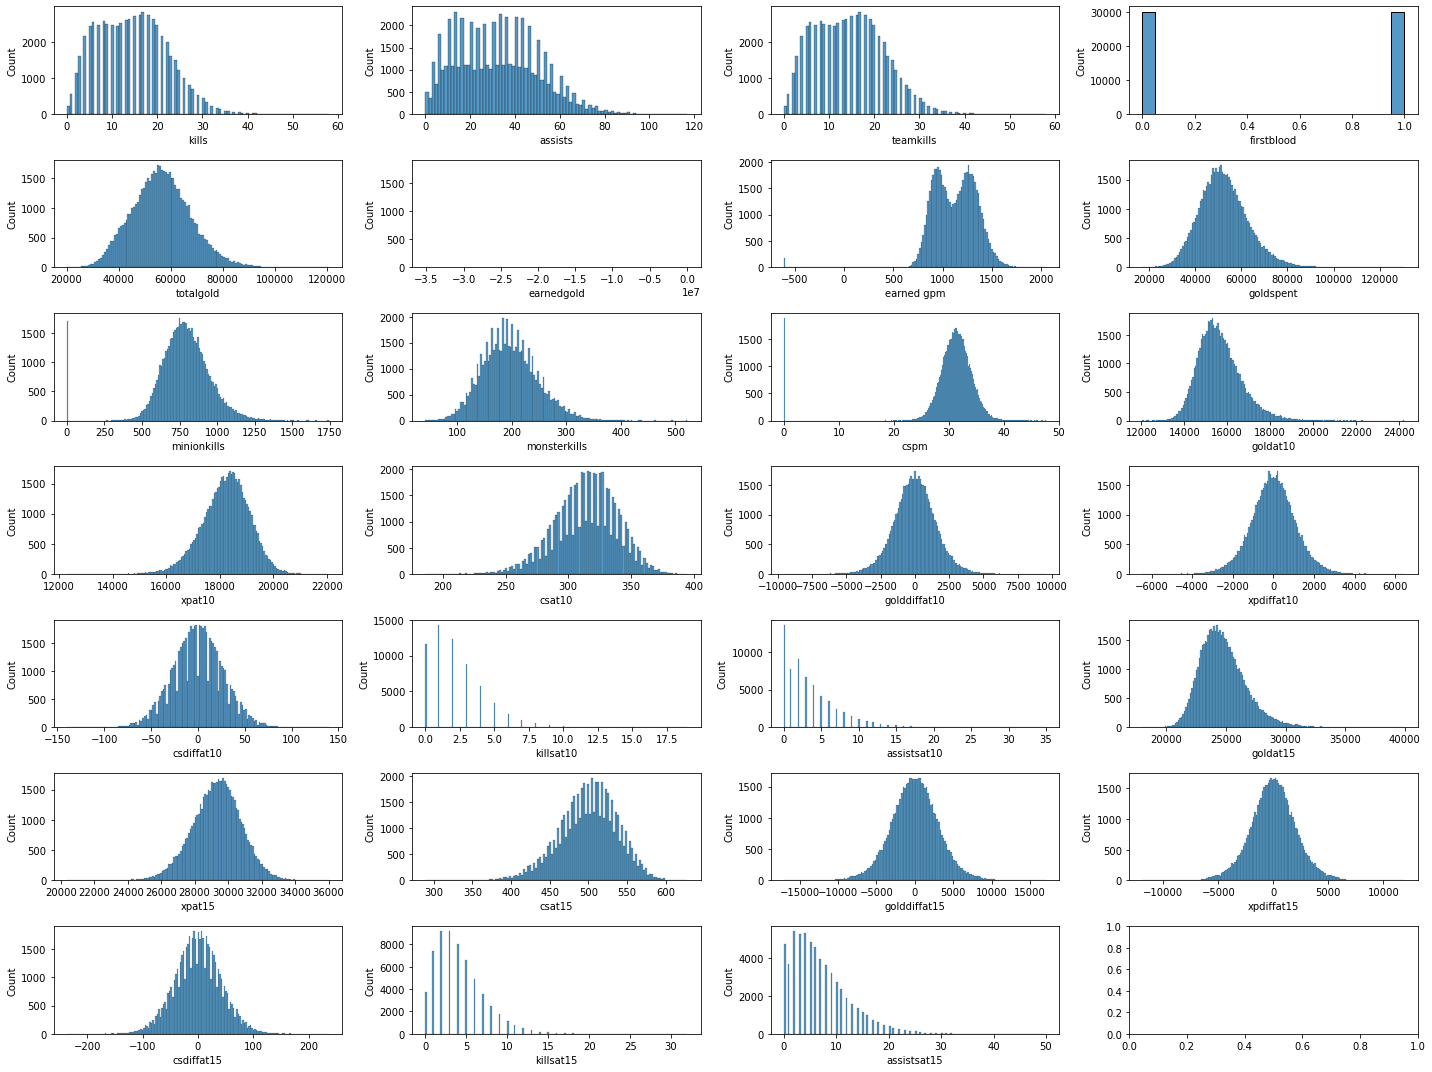

In [210]:
# visualize distribution of unscaled data in each feature
plot_num = 1

plt.subplots(7,4, figsize=(20,15))

for col in X:
    plt.subplot(7,4,plot_num)
    sns.histplot(X[col])
    plot_num +=1

plt.tight_layout()
plt.show()

---
In the above charts we can see our data has a standard distribution, and we can conclude that we have a normal distribition among our data.

Since we do have normal distribution we can go ahead and use standard scalaer to scale our data and influnce our model and get better accuracy, before that lets splity our data first, and see how our base model looks.

---
## Spliting the data

The next step in our process after checking how our data is distributed, is to split our data. This spliting step consists of :

In [217]:
# Split the data into remainder and test sets
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=1)

# Print info on how the data has been split
print(f'The remainder set has {len(X_rem)} data points.')
print(f'The test set has {len(X_test)} data points.')

The remainder set has 48104 data points.
The test set has 12027 data points.


In [218]:
# Baseline logistic regression
# 1.Instantiate and fit to the remainder set
baseline_logreg = LogisticRegression(random_state=1).fit(X_rem, y_rem)

# Print the accuracies
print("---Fisrt Model with all Features---")
print(f'Accuracy on remainder set: {baseline_logreg.score(X_rem, y_rem)}')
print(f'Accuracy on test set: {baseline_logreg.score(X_test, y_test)}')

---Fisrt Model with all Features---
Accuracy on remainder set: 0.9615832363213038
Accuracy on test set: 0.963415648125052


In [219]:
baseline_logreg.coef_

array([[ 2.41636958e-04,  6.26512155e-04,  2.41636958e-04,
        -9.65844624e-07,  1.33325589e-03, -7.33412642e-07,
         8.31047858e-03, -1.26133733e-03, -4.00661579e-03,
         2.00353299e-05,  1.45081829e-05, -8.29115151e-04,
        -2.15916422e-04,  2.57054597e-06, -6.48724239e-05,
         2.82787029e-04,  2.74259518e-05,  4.07947710e-06,
         5.34936961e-06,  4.61003036e-04, -3.38671710e-04,
        -9.94209903e-06, -1.45126704e-04,  7.15043137e-04,
         4.86118149e-05,  8.20720344e-06,  1.03617109e-05]])

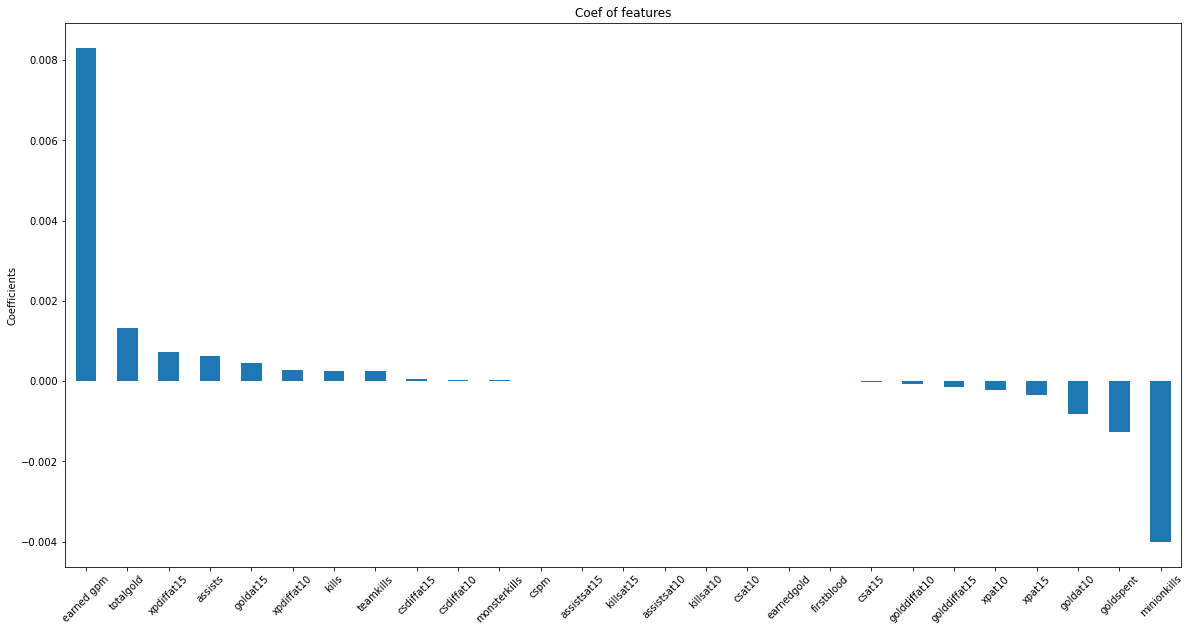

In [220]:
# Plot the coefficient
coef = pd.DataFrame(
    {"coefficients": baseline_logreg.coef_[0]},
    index=X.columns
).sort_values("coefficients", ascending=False)

coef.plot(kind="bar", figsize=(20,10), legend=False)
plt.title("Coef of features")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

---
**In the above graph, we can see that there is not a dominating coefficient / variable, as we were expecting `earned gpm` which stand for gold per minuite and `totalgold`  are two variables we have in our data that doing most of the work on our base model and main reason we have such a high accuracy.**

---

We have now recognized which variables are the main reason for our high accuracy. We will set them aside and proceed to run our model again by removing those two columns.

It is important to mention that we decided to drop some other columns as well `['kills', 'assists', 'teamkills', 'totalgold', 'earnedgold', 'earned gpm', 'goldspent', 'minionkills', 'monsterkills', 'cspm', 'golddiffat10', 'xpdiffat10', 'csdiffat10', 'golddiffat15', 'xpdiffat15', 'csdiffat15']` and keep our new models for predicting the game result based on the first 15 minutes of the game just based on information we are going to have on that first 15 minutes. In addition, we also removed the information that could possibly lead our model to being bias, e.g. columns that mentioned an even diffrence of the gold golddifat15. Further below, we will make a simpler model but more accurate and without having some features carry the weight of our model.

---
### Logestic Regression model

Build Logestic Regression model try to predict win percentage based on golf and XP earned on first 15 minutes of the game.

---

In [337]:
import pandas as pd

# The independent variable
X = lol2_df.drop(['teamname', 'result', 'kills', 'assists', 'teamkills',
       'totalgold', 'earnedgold', 'earned gpm', 'goldspent', 'minionkills',
       'monsterkills', 'cspm', 'golddiffat10',
       'xpdiffat10', 'csdiffat10', 'golddiffat15', 'xpdiffat15', 'csdiffat15'], axis=1)

# The dependent variable
y = lol2_df['result']

print('Shape of X:', X.shape)
print('Shape of y:', y.shape)




Shape of X: (60131, 11)
Shape of y: (60131,)


In [344]:
df=pd.concat([X,y], axis=1)

In [349]:
# Calculate the correlation coefficients between X and y
corr_coef = df.corr()
print(corr_coef['result'])

firstblood     0.220568
goldat10       0.351349
xpat10         0.258626
csat10         0.183793
killsat10      0.224784
assistsat10    0.198350
goldat15       0.451168
xpat15         0.357712
csat15         0.226572
killsat15      0.291436
assistsat15    0.267492
result         1.000000
Name: result, dtype: float64


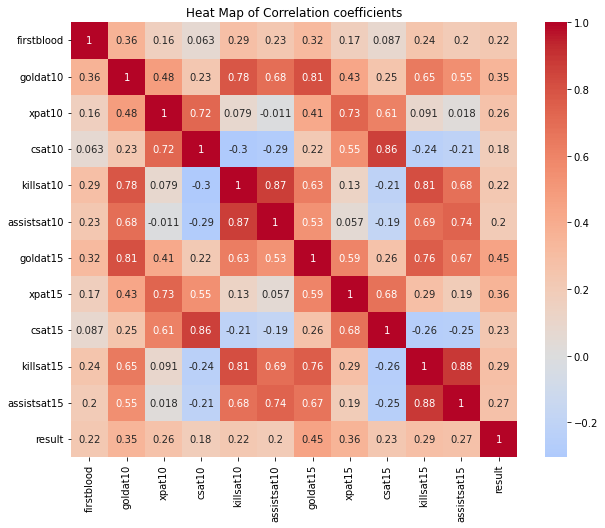

In [351]:
# Generating heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_coef, annot=True, cmap='coolwarm', center=0)

# Set plot title
plt.title('Heat Map of Correlation coefficients')

# Show the plot
plt.show()

---
Now that we set our new X and Y variables, we split our data again with our new X.

---

In [236]:
# Split the data into remainder and test sets
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=1)

# Print info on how the data has been split
print(f'The remainder set has {len(X_rem)} data points.')
print(f'The test set has {len(X_test)} data points.')

The remainder set has 51111 data points.
The test set has 9020 data points.


In [237]:
# Baseline logistic regression

base_logreg = LogisticRegression(random_state=1).fit(X_rem, y_rem)
base_logreg_unsc_rem = base_logreg.score(X_rem, y_rem)
base_logreg_unsc_test = base_logreg.score(X_test, y_test)
# Print the accuracies
print("---Unscaled data---")
print(f'Accuracy on remainder set: {base_logreg.score(X_rem, y_rem)}')
print(f'Accuracy on test set: {base_logreg.score(X_test, y_test)}')

---Unscaled data---
Accuracy on remainder set: 0.6536362035569643
Accuracy on test set: 0.6545454545454545


---
Great! We can notice a significant drop on our accuracy score for both of  our sets. Both sets are ~65%, which means we have a good fit as well. We will validate our sets as mentioned earlier, then scale our data and try to improve our models.

We will keep these scores in record for later.

As mentioned earlier, we can set our test set aside and split our remainder of data into a train and validation set.

---

In [238]:
# Split the remainder set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=0.15,stratify=y_rem, random_state=1)

# Print info on how the data has been split
print(f'The train set has {len(X_train)} data points.')
print(f'The validation set has {len(X_val)} data points.')

The train set has 43444 data points.
The validation set has 7667 data points.


Next, let's scale our data and see how it performs. As we previously observed, since we have normal ditribution we are going to use a standard scaler.

Alternatively, we can use a pipline and grid search to find best scaler and hyperparameters for our model.

---
### Scaling the data

In [239]:
### SCALING
# Instantiate
ss = StandardScaler()

# Fit - on the TRAINING DATA
ss.fit(X_rem)

# Transform - all the datasets
X_rem_ss = ss.transform(X_rem)
X_train_ss = ss.transform(X_train)
X_validation_ss = ss.transform(X_val)
X_test_ss = ss.transform(X_test)

In [240]:
# fit the model on scaled data
# 1.instantiate the model
Validated_logreg = LogisticRegression(random_state=1)

# 2. Fit the model
Validated_logreg.fit(X_train_ss, y_train)

# 3. Score the model
Validated_logreg_ss_train_acc = Validated_logreg.score(X_train_ss, y_train)
Validated_logreg_ss_val_acc = Validated_logreg.score(X_validation_ss,y_val)

print("---Standard Scaler data---")
print(f"Training accuracy: {Validated_logreg_ss_train_acc}")
print(f"Validation accuracy: {Validated_logreg_ss_val_acc}")

---Standard Scaler data---
Training accuracy: 0.7055749930945585
Validation accuracy: 0.7078387896178427


In [241]:
# Let's try a modest range of C values
c_values = [.00001, .0001, .001, .1, 1, 10, 100, 1000, 10000,100000]

# Set up empty lists
train_accuracies = []
validation_accuracies = []

# Iterate over the C values
for value in c_values:

    # Instantiate a log reg and fit to the train set
    logreg = LogisticRegression(C=value, random_state=1).fit(X_train_ss, y_train)

    # Score on the train set and append this accuracy to its respective list
    train_accuracies.append(logreg.score(X_train_ss, y_train))

    # Score on the validation set and append this accuracy to its respective list
    validation_accuracies.append(logreg.score(X_validation_ss, y_val))

In [242]:

pd.DataFrame({'C value': c_values, 'train accuracy': train_accuracies, 'validation accuracy': validation_accuracies})

,C value,train accuracy,validation accuracy
0,0.00001,0.690406,0.695970
1,0.00010,0.696299,0.700665
2,0.00100,0.702951,0.709404
3,0.10000,0.705207,0.708361
4,1.00000,0.705575,0.707839
5,10.00000,0.705506,0.707969
6,100.00000,0.705529,0.707969
7,1000.00000,0.705529,0.707969
8,10000.00000,0.705529,0.707969
9,100000.00000,0.705529,0.707969


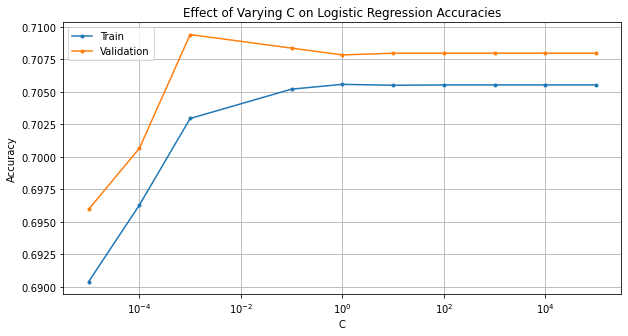

In [243]:
# Plot the accuracies
plt.figure(figsize=(10, 5))
plt.plot(c_values, train_accuracies, label='Train', marker='.')
plt.plot(c_values, validation_accuracies, label='Validation', marker='.')
plt.legend()
plt.title('Effect of Varying C on Logistic Regression Accuracies')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

---
The next step is to pick the value of C that yields the highest validation accuracy without the train accuracy being too high so we dont overfit our model. Based on the above table and plot lets choose a C value of 100. Our result is quite significant, the chart becomes straight line so no need to pick a higher number.

We will continue on to build our final model and score it on remainder and test sets.

---

In [247]:
# 1.instantiate the model
Validated_logreg = LogisticRegression(C=100, random_state=1)

# 2. Fit the model
Validated_logreg.fit(X_rem_ss, y_rem)

# 3. Score the model
Validated_logreg_opt_rem_acc = Validated_logreg.score(X_rem_ss, y_rem)
Validated_logreg_opt_test_acc = Validated_logreg.score(X_test_ss, y_test)

print("---Optimized data---")
print(f"Remainder  accuracy: {Validated_logreg_opt_rem_acc}")
print(f"Test accuracy: {Validated_logreg_opt_test_acc}")

---Optimized data---
Remainder  accuracy: 0.7053863160572088
Test accuracy: 0.7045454545454546


---
Following up with the step taken above, we see there is a minor difference between accuracy score between our two tests. We can conclude there is no over fitting in our model and once we optimized our model with C value of 100 we witnessed an improvement in performance of our model and our final model have ~70% test accuracy score, it has ~5% increase compared to based model.

We are happy with result of our **Logisitic Regresion** Model. Now that we are satisfied with these results, we will compare the performnace of different models.

There are 2 reasons why we say that we are happy with the performance of our model. First, we were able to increase the accuracy by ~5%. Second, since every game can last from minimum 20 minutes to maxium of 45-55 minutes, it would be very hard to predict the game result just based on the first 15 minutes, but the fact that we don't have super high accuracy score, makes our model more accurate and from stand point of the game, more realistic.

---

---
### Confusion Matrix


We are done building our model, next we are going to use confusion matrix, to evaluate and how our model performed.

We will do this for every single model we are going to build and at the end we will compare their performances.

---

In [248]:
# Get class predictions
y_pred = Validated_logreg.predict(X_test_ss)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Victory", "Defeat"],
    index=["True Victory", " True Defeat"]
)

display(cf_df)

,Victory,Defeat
True Victory,3214,1296
True Defeat,1369,3141


In [73]:
!pip install scikit-learn


In [74]:
!pip install --upgrade scikit-learn


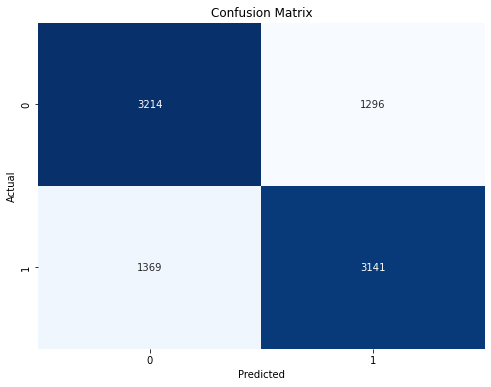

In [250]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Validated_logreg is your trained model
# Assuming X_test_ss is your scaled test data and y_test is your test labels
y_pred = Validated_logreg.predict(X_test_ss)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix as a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


 In our confusion matrix for our Logistic Regresion model we can see that out of  4,510 games won, 3214(71.2%) games were correctly classified and 1296 were incorrectly classified as  defeat but in fact they are the games have been won.

Also just to clarify are top row is the games won and bottom row is games lost we have total of 4,510 games in which 3214 total won  and 1296 games lost. we see a balance number between the number were correctly and incorrectly classified, and it does makes sense that we have such a high classification since we are trying to predict the game results solely based on the gold and experinced earned on the first 15 minutes of the game.

Conclusion is that our model classified ~71% our data correctly for games won, and ~69% of loses were classified correctly. we will keep this mumber on the side and once we finished our model we can compare to each other and see which model performs better. 

## Decesion Tree Model

---
Next, we move our focus towards the decision tree model.

The Decision Tree classifiers do not require data to be scaled as they are not sensitive to variance.

---

In [251]:
# Instantiate the model
DT_model = DecisionTreeClassifier(max_depth=1, random_state=1)

# Fit to the training data
DT_model.fit(X_rem, y_rem)

DT_model_rem_unscb = DT_model.score(X_rem, y_rem)
DT_model_test_unscb = DT_model.score(X_test,y_test)
# Score the model
# Evaluate its classification accuracy
print("---Unscaled data---")
print(f"The TRAIN classification accuracy is:  {DT_model.score(X_rem, y_rem)}")
print(f"The TEST classification accuracy is:  {DT_model.score(X_test,y_test)}")

---Unscaled data---
The TRAIN classification accuracy is:  0.6943123789399542
The TEST classification accuracy is:  0.6976718403547671


---
Based on the above score, so far seems like our decesion tree base model has better scores than our Logistic base model. Keep in my mind this is model just with a max depth of one.

We will cheack and evaluate the score to see if we can let our tree grow to max.

---

In [252]:
# Instantiate the model
DT_model = DecisionTreeClassifier(random_state=1)

# Fit to the training data
DT_model.fit(X_rem, y_rem)

# Score the model
# Evaluate its classification accuracy
print(f"The TRAIN classification accuracy is:  {DT_model.score(X_rem, y_rem)}")
print(f"The TEST classification accuracy is:  {DT_model.score(X_test,y_test)}")

The TRAIN classification accuracy is:  1.0
The TEST classification accuracy is:  0.6189578713968958


In [253]:
DT_model.get_depth()

42

---
This of couse is going to be an overfit model, but we would like to see the scores and check how far our tree grows. The result? The growth depth of our Decesion Tree model is 41.

After the previous setup, we will find the best `max_depth` for our model, in order to find out the best performnace point in our model.

We now know how big our tree will grow. In the next step we will find the most optimized *max_depth* for our Decesion Tree model.

---

In [254]:
OP = np.arange(1,47)
for depth in OP:

    # 1. Instantiate - DECISION STUMP
    DT_model = DecisionTreeClassifier(max_depth=depth)

    # 2. Fit
    DT_model.fit(X_train_ss, y_train)

    # 3. Score - on both train and validation set
    train_score = DT_model.score(X_train_ss, y_train)
    validation_score = DT_model.score(X_validation_ss, y_val)

    print(f'Max depth: {depth}, Train score:{train_score}, Validation score:{validation_score}')

Max depth: 1, Train score:0.6945953411288095, Validation score:0.695708882222512
Max depth: 2, Train score:0.6945953411288095, Validation score:0.695708882222512
Max depth: 3, Train score:0.6945953411288095, Validation score:0.695708882222512
Max depth: 4, Train score:0.6965749010220054, Validation score:0.6998826137994
Max depth: 5, Train score:0.7006951477764478, Validation score:0.7031433415938437
Max depth: 6, Train score:0.706012337722125, Validation score:0.7052302073822877
Max depth: 7, Train score:0.7091428045299696, Validation score:0.6998826137994
Max depth: 8, Train score:0.7146901758585765, Validation score:0.701447763140733
Max depth: 9, Train score:0.7222171070803793, Validation score:0.7017086213642885
Max depth: 10, Train score:0.7341865389927262, Validation score:0.6882744228511803
Max depth: 11, Train score:0.7470306601602063, Validation score:0.6821442545976262
Max depth: 12, Train score:0.762890157444066, Validation score:0.6786226685796269
Max depth: 13, Train scor

In [81]:
start = time.time()

# A list of the maximum depths to try out and save to 'depths'
depths = range(1, int(np.sqrt(X_train.shape[0])))

# Empty lists to append to
train_acc = []
val_acc = []

# Loop through the depths
for max_depth in depths:

    # Instantiate the model
    DT_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

    # Fit the model
    DT_model.fit(X_train, y_train)

    # Score the model
    train_acc.append(DT_model.score(X_train, y_train))
    val_acc.append(DT_model.score(X_val, y_val))

stop = time.time()
runtime_DT_model = stop-start
print(f"Runtime: {round(runtime_DT_model,2)} seconds")

Runtime: 67.23 seconds


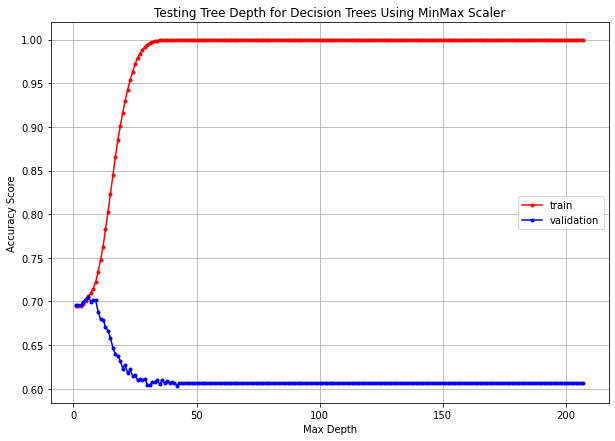

In [82]:
# Plotting the accuracies
plt.figure(figsize=(10, 7))
plt.plot(depths, train_acc, c='red', label='train', marker='.')
plt.plot(depths, val_acc, c='blue', label='validation', marker='.')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.title('Testing Tree Depth for Decision Trees Using MinMax Scaler')
plt.grid()
plt.legend()
plt.show()

We going to select max_depth=6 as the model start to overfit beyond that point, and we can see our validation set is starts to drop significantly after thatpoint.



In [255]:
# Instantiate the model
DT_model = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit the model
DT_model.fit(X_rem, y_rem)

# Store accuracy scores
DT_model_train_unsc = DT_model.score(X_rem, y_rem)
DT_model_test_unsc = DT_model.score(X_test, y_test)

# Score the model
print("---Unscaled data---")
print(f"Train Accuracy: {DT_model_train_unsc}")
print(f"Test Accuracy: {DT_model_test_unsc}")

---Unscaled data---
Train Accuracy: 0.7062080569740369
Test Accuracy: 0.7012195121951219


In [256]:
# Instantiate the model
DT_model = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit the model
DT_model.fit(X_train,y_train)

# Store accuracy scores
DT_model_train = DT_model.score(X_train, y_train)
DT_model_test = DT_model.score(X_val, y_val)

# Score the model
print(f"Train Accuracy: {DT_model_train}")
print(f"Test Accuracy: {DT_model_test}")

Train Accuracy: 0.706012337722125
Test Accuracy: 0.70509977827051


In [257]:
DT_model = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit the model 
DT_model.fit(X_train_ss,y_train)

# Store accuracy scores
DT_model_train_ss = DT_model.score(X_train_ss, y_train)
DT_model_test_ss = DT_model.score(X_validation_ss, y_val)

# Score the model 
print("---Standard Scaler data---")
print(f"Train Accuracy: {DT_model_train_ss}")
print(f"Test Accuracy: {DT_model_test_ss}")

---Standard Scaler data---
Train Accuracy: 0.706012337722125
Test Accuracy: 0.70509977827051


In [258]:
# Instantiate the model
DT_model = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit the model
DT_model.fit(X_rem_ss,y_rem)

# Store accuracy scores
DT_model_rem_optg = DT_model.score(X_rem_ss, y_rem)
DT_model_test_optg = DT_model.score(X_test_ss, y_test)

# Score the model
print("---Optimized data---")
print(f"Train Accuracy: {DT_model_rem_optg}")
print(f"Test Accuracy: {DT_model_test_optg}")

---Optimized data---
Train Accuracy: 0.7062080569740369
Test Accuracy: 0.7012195121951219


---
We can notice that in our entire traning our decesion tree model performance resumed almost the same, and our foinal and best model in Decesion Tree has an accuracy of ~70%. Our model looks good, doesn't seem like an overfit. We will keep these number in record, so we can compare them in the end with our other models.

---

## Confusion Matrix for our Decesion Tree

In [259]:
# Get class predictions
y_pred = DT_model.predict(X_test_ss)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Victory", "Defeat"],
    index=["True Victory", " True Defeat"]
)

display(cf_df)

,Victory,Defeat
True Victory,3385,1125
True Defeat,1570,2940


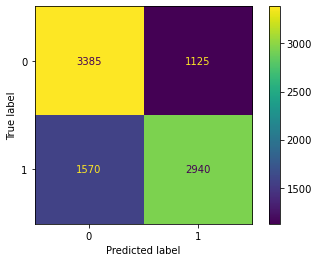

In [260]:
# TO plot Confusion matrix
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
# the function expects the estimator, inputs and target as parameters
plot_confusion_matrix(DT_model, X_test_ss, y_test);

 Now lets see the numbers for our confusion matrix for our Decesion Tree model,
 * 3,385( ~75.05 %) games were correctly classified for games won,
 * and 2,940(~65.18%) games were correctly classified for matches lost.

we wont go into details and compare our decesion Tree model performance with our logistic regresion model yet, lets evalutae all of our models performance once we have them all at end of the report and discuss it in detail. 

---
## XGBoosting

Next we have XG Boosting classifier, we will follow exact same steps we did for our pervios two model, and in the end of the report compare and evalute our models.

In [261]:
# Base model
# Instantiate the model
XGB_model = XGBClassifier(random_state=1)

# Fit the model
XGB_model.fit(X_rem, y_rem)

# Store accuracy scores
XGB_model_rem_unsc = XGB_model.score(X_rem, y_rem)
XGB_model_test_unsc = XGB_model.score(X_test, y_test)

# Score the model
print("---Unscaled data---")
print(f"Remainder Accuracy: {XGB_model_rem_unsc}")
print(f"Test Accuracy: {XGB_model_test_unsc}")

---Unscaled data---
Remainder Accuracy: 0.7652755766860363
Test Accuracy: 0.694789356984479


In [262]:

# Instantiate the model
XGB_model = XGBClassifier(random_state=1)

# Fit the model
XGB_model.fit(X_train, y_train)

# Store accuracy scores
XGB_model_train_unsc = XGB_model.score(X_train, y_train)
XGB_model_val_unsc = XGB_model.score(X_val, y_val)

# Score the model
print("---Unscaled data---")
print(f"Train Accuracy: {XGB_model_train_unsc}")
print(f"Test Accuracy: {XGB_model_val_unsc}")

---Unscaled data---
Train Accuracy: 0.7716600681336894
Test Accuracy: 0.7013173340289552


In [263]:
# scaled data
# Instantiate the model
XGB_model = XGBClassifier(random_state=1)

# Fit the model
XGB_model.fit(X_train_ss, y_train)

# Store accuracy scores
XGB_model_train_ss = XGB_model.score(X_train_ss, y_train)
XGB_model_val_ss = XGB_model.score(X_validation_ss, y_val)

# Score the model
print("---Standard Scaler data---")
print(f"Train Accuracy: {XGB_model_train_ss}")
print(f"Test Accuracy: {XGB_model_val_ss}")

---Standard Scaler data---
Train Accuracy: 0.7716600681336894
Test Accuracy: 0.7013173340289552


In [268]:
# Bulidng parameter and finding hyperparameter for our XGBoost
XGB_model = XGBClassifier(n_jobs=-1)

param_grid = {'n_estimators': np.arange(1, 200, 10), 'max_depth': np.arange(1, 10)}
grid_xgb = GridSearchCV(XGB_model, param_grid=param_grid, verbose=1, n_jobs=-1)

grid_xgb.fit(X_rem_ss, y_rem)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimator

In [269]:
grid_xgb.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [270]:
# we cast max_depth to str so that seaborn treats it like a category,
# which is better for visuals
results_df = pd.DataFrame({
    "n_estimators": grid_xgb.cv_results_["param_n_estimators"],
    'max_depth': grid_xgb.cv_results_["param_max_depth"].astype(str),
    'mean_score': grid_xgb.cv_results_["mean_test_score"]
})

results_df.head()

,n_estimators,max_depth,mean_score
0,1,1,0.692141
1,11,1,0.699791
2,21,1,0.701884
3,31,1,0.702373
4,41,1,0.702432


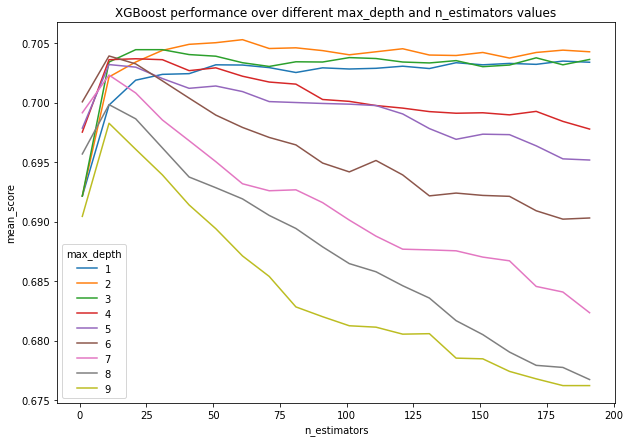

In [271]:
# Plot to find best max_depth for XGBoost
plt.figure(figsize=(10, 7))
sns.lineplot(x="n_estimators", y="mean_score", hue="max_depth", data=results_df)
plt.title("XGBoost performance over different max_depth and n_estimators values")
plt.show()

In [272]:

# Get the best parameters and best score
best_params = grid_xgb.best_params_
best_score = grid_xgb.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'max_depth': 2, 'n_estimators': 61}
Best Score: 0.7052885398329061


As we can see in above *max_depth* 1 and 2 are kind of going toe to toe, but it seems like `max_depth=2` do have slight edge and by checking our best estimator we see that it says the exat samething and confrims at `max_depth=2`our model would optimized the most.

Now lets instantite our final model for our XGBosst Model.





In [273]:
# Instantiate the model 
XGB_model = XGBClassifier(max_depth=2, random_state=1,)

# Fit the model 
XGB_model.fit(X_rem_ss, y_rem)

# Store accuracy scores
XGB_model_rem_opt = XGB_model.score(X_rem_ss, y_rem)
XGB_model_test_opt = XGB_model.score(X_test_ss, y_test)

# Score the model 
print("---Optimized data---")
print(f"Remainder Accuracy: {XGB_model_rem_opt}")
print(f"Test Accuracy: {XGB_model_test_opt}")

---Optimized data---
Remainder Accuracy: 0.7087515407642191
Test Accuracy: 0.7075388026607539


Confusion Matrix for XGBoost

In [274]:
# Get class predictions
y_pred = grid_xgb.predict(X_test_ss)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Victory", "Defeat"],
    index=["True Victory", " True Defeat"]
)

display(cf_df)

,Victory,Defeat
True Victory,3260,1250
True Defeat,1394,3116


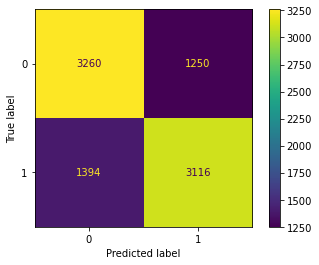

In [275]:
# TO plot Confusion matrix
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
# the function expects the estimator, inputs and target as parameters
plot_confusion_matrix(grid_xgb, X_test_ss, y_test);

Lets see how are the number look for our XGBoost model,

* 3,260( ~72.28 %) games were correctly classified for games won


* 3,116(~69.09.24%) games were correctly classified for matches lost

---
## Secondry objective affects on the game result


So far we have created 2 models for our first problem based on our first dataframe, which only contains all sort of gold income and exparience in the game. We had fairly good result with Test a accuracy Score of ~70% for our Logistic Regression model and our Decesion Tree with ~69% test Accuracy score.

Now that we are done with builidng models for our first question based on Gold&EXP, let's look at different aspects that can change the outcome of the game or give an upperhand to the team who was losing and now have a chance to become victorious.

That being said, we will proceed to focus on different metrics of the game, such as Secondary Objectives (Baron Buff, Dragons, Towers). Lets take these metrics into consideration and see the performance of our models.

### Logistic Regression 

Same as our first model that we created based on Gold&EXP before, we set our independent and dependent variables. First we will drop teamname,earned gpm,totalgold since they have high coefecient and do most of the job on our model.

We will also drop all the columns that we used for our first model as we want to focus our analysis only based on the objectives we do not want their influence in our model.

In [353]:
# The independent variables 
X = lol_df.drop(['teamname', 'result', 'kills', 'assists', 'teamkills',
       'firstblood', 'controlwardsbought', 'totalgold',
       'earnedgold', 'earned gpm', 'goldspent', 'minionkills', 'monsterkills',
       'cspm', 'goldat10', 'xpat10', 'csat10', 'golddiffat10', 'xpdiffat10',
       'csdiffat10', 'killsat10', 'assistsat10', 'goldat15', 'xpat15',
       'csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15',
       'assistsat15'], axis=1)

# The dependent variable 
y = lol_df['result']

print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (60131, 21)
Shape of y: (60131,)


In [354]:
df2=pd.concat([X,y], axis=1)


In [355]:
# Calculate the correlation coefficients between X and y
corr_coef = df2.corr()
print(corr_coef['result'])

side                      0.055795
firstdragon               0.186875
dragons                   0.601332
infernals                 0.252948
mountains                 0.240961
clouds                    0.220156
oceans                    0.251324
chemtechs                 0.088108
hextechs                  0.147008
dragons (type unknown)    0.066378
elders                    0.142418
firstherald               0.178860
heralds                   0.290060
firstbaron                0.661842
barons                    0.628936
firsttower                0.373102
towers                    0.884644
firstmidtower             0.463571
firsttothreetowers        0.563719
turretplates              0.161855
inhibitors                0.748890
result                    1.000000
Name: result, dtype: float64


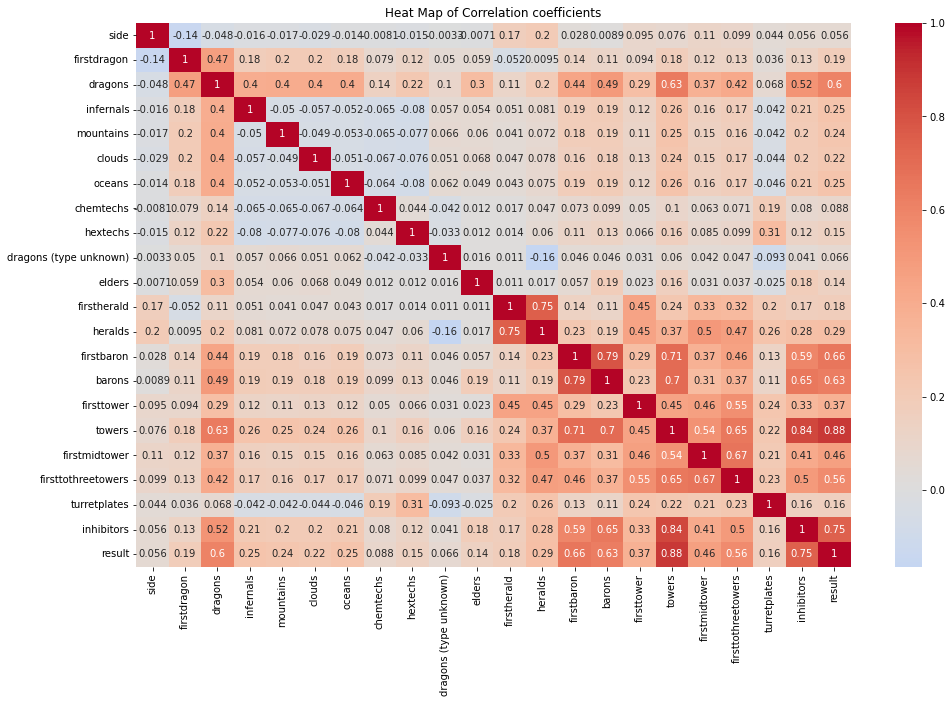

In [358]:
# Generating heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr_coef, annot=True, cmap='coolwarm', center=0)

# Set plot title
plt.title('Heat Map of Correlation coefficients')

# Show the plot
plt.show()

In [277]:
# Split the data into remainder and test sets
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.15,stratify=y, random_state=1)

# Print info on how the data has been split
print(f'The remainder set has {len(X_rem)} data points.')
print(f'The test set has {len(X_test)} data points.')

The remainder set has 51111 data points.
The test set has 9020 data points.


In [278]:
#Baseline logistic regression
# Instantiate and fit to the remainder set
baseline_logreg = LogisticRegression(random_state=1).fit(X_rem, y_rem)

OBJ_rem_unsc = baseline_logreg.score(X_rem, y_rem)
OBJ_test_unsc = baseline_logreg.score(X_test, y_test)
# Print the accuracies
print(f'Accuracy on remainder set: {baseline_logreg.score(X_rem, y_rem)}')
print(f'Accuracy on test set: {baseline_logreg.score(X_test, y_test)}')

Accuracy on remainder set: 0.9623760051652286
Accuracy on test set: 0.9625277161862528


In [280]:
# just checking for coefficients same as our first model
baseline_logreg.coef_

array([[ 0.06402528,  0.23235789,  0.32962221,  0.12987752,  0.11173521,
        -0.00238904,  0.11961905, -0.0025763 ,  0.20022647,  0.09848174,
        -0.2268707 ,  0.0710881 , -0.1937341 ,  0.92473745, -0.85176   ,
        -0.09755415,  1.69644431,  0.28919968, -0.27782416, -0.06163818,
        -0.37454889]])

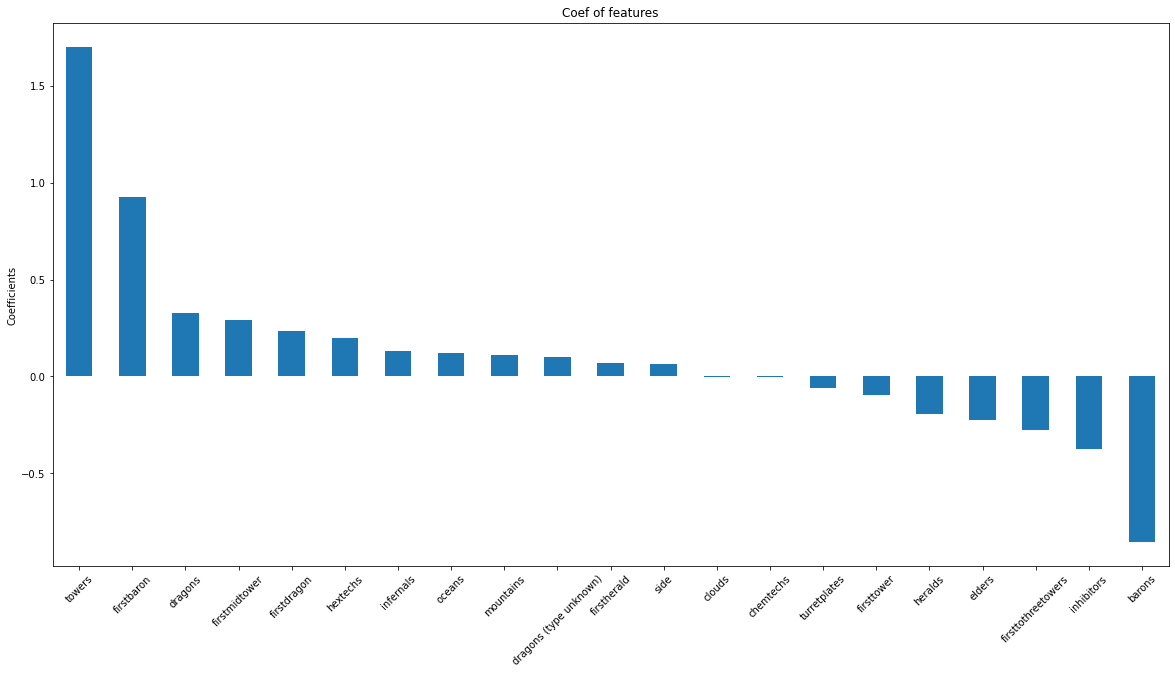

In [281]:
# Plot the coefficient
coef = pd.DataFrame(
    {"coefficients": baseline_logreg.coef_[0]},
    index=X.columns
).sort_values("coefficients", ascending=False)

coef.plot(kind="bar", figsize=(20,10), legend=False)
plt.title("Coef of features")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

---
During our observation we can tell there is big weight being lifted by `towers`,`firstmidtower`,`firsttothreetowers`,`inhibitors`, `firstbaron` and `barons`. We can not drop `barons` column since it is one of the feature that we are building and basing our second question on, also it is totally understandable and acceptable that baron have this coefficient since is one the 2 strongest buff in the game and even if a team is losing, it can give them the upper hand to change the outcome of the game.

We definitely wanted to analysis the game results based on turrets as well as they are considered a secondary objective, but we made the decesion to drop them and keep them out of equation, and focus our model solely on other resources like Baron, Dragons, Elder Dragon and Rift Herald.

I have also included this in our analysis which, we will go more into detail later in the report.

Now we will drop the columns and see if there is any difference in the performance of our model.

---

In [282]:
# The independent variables 
X = lol_df.drop(['teamname', 'result', 'kills', 'assists', 'teamkills',
       'firstblood', 'controlwardsbought', 'totalgold',
       'earnedgold', 'earned gpm', 'goldspent', 'minionkills', 'monsterkills',
       'cspm', 'goldat10', 'xpat10', 'csat10', 'golddiffat10', 'xpdiffat10',
       'csdiffat10', 'killsat10', 'assistsat10', 'goldat15', 'xpat15',
       'csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15',
       'assistsat15','firstbaron','towers','inhibitors','firstmidtower','firsttothreetowers'], axis=1)

# The dependent variable 
y = lol_df['result']

print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (60131, 16)
Shape of y: (60131,)


In [283]:
# Split the data into remainder and test sets
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.15,stratify=y, random_state=1)

# Print info on how the data has been split
print(f'The remainder set has {len(X_rem)} data points.')
print(f'The test set has {len(X_test)} data points.')

The remainder set has 51111 data points.
The test set has 9020 data points.


In [284]:
# Baseline logistic regression
# Instantiate and fit to the remainder set
baseline_logreg = LogisticRegression(random_state=1).fit(X_rem, y_rem)

OBJ_rem_unsc = baseline_logreg.score(X_rem, y_rem)
OBJ_test_unsc = baseline_logreg.score(X_test, y_test)
# Print the accuracies
print(f'Accuracy on remainder set: {baseline_logreg.score(X_rem, y_rem)}')
print(f'Accuracy on test set: {baseline_logreg.score(X_test, y_test)}')

Accuracy on remainder set: 0.8685605838273561
Accuracy on test set: 0.8754988913525499


---
Following up, we do have high accuracy and good fit model,  also we can confidently say this model is not being influenced with the other features we had in our base model that we ran with a 96% of the accuracy. 

Now that we have been cleaned the data and kept the features that we need we can start scaling and optimizing our logistic regression model and continue with our analysis and comparing their performances.

We will follow same steps :

1. split train data into remainder/test set and train/validation set

2. Scale our data 

3. Optimize the data and fit our final data

4. Creat confusion matrix for each model

please note as we are exact same models and steps as we did for our initial question of intrest, we will reduce amount of explanation during steps taken moving forward, howevr that does not mean we are not going to eplain them, we will simply go into detail and camparison once we are done building all our model.

---

In [285]:
# Split the remainder set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=0.15,stratify=y_rem, random_state=1)

# Print info on how the data has been split
print(f'The train set has {len(X_train)} data points.')
print(f'The validation set has {len(X_val)} data points.')

The train set has 43444 data points.
The validation set has 7667 data points.


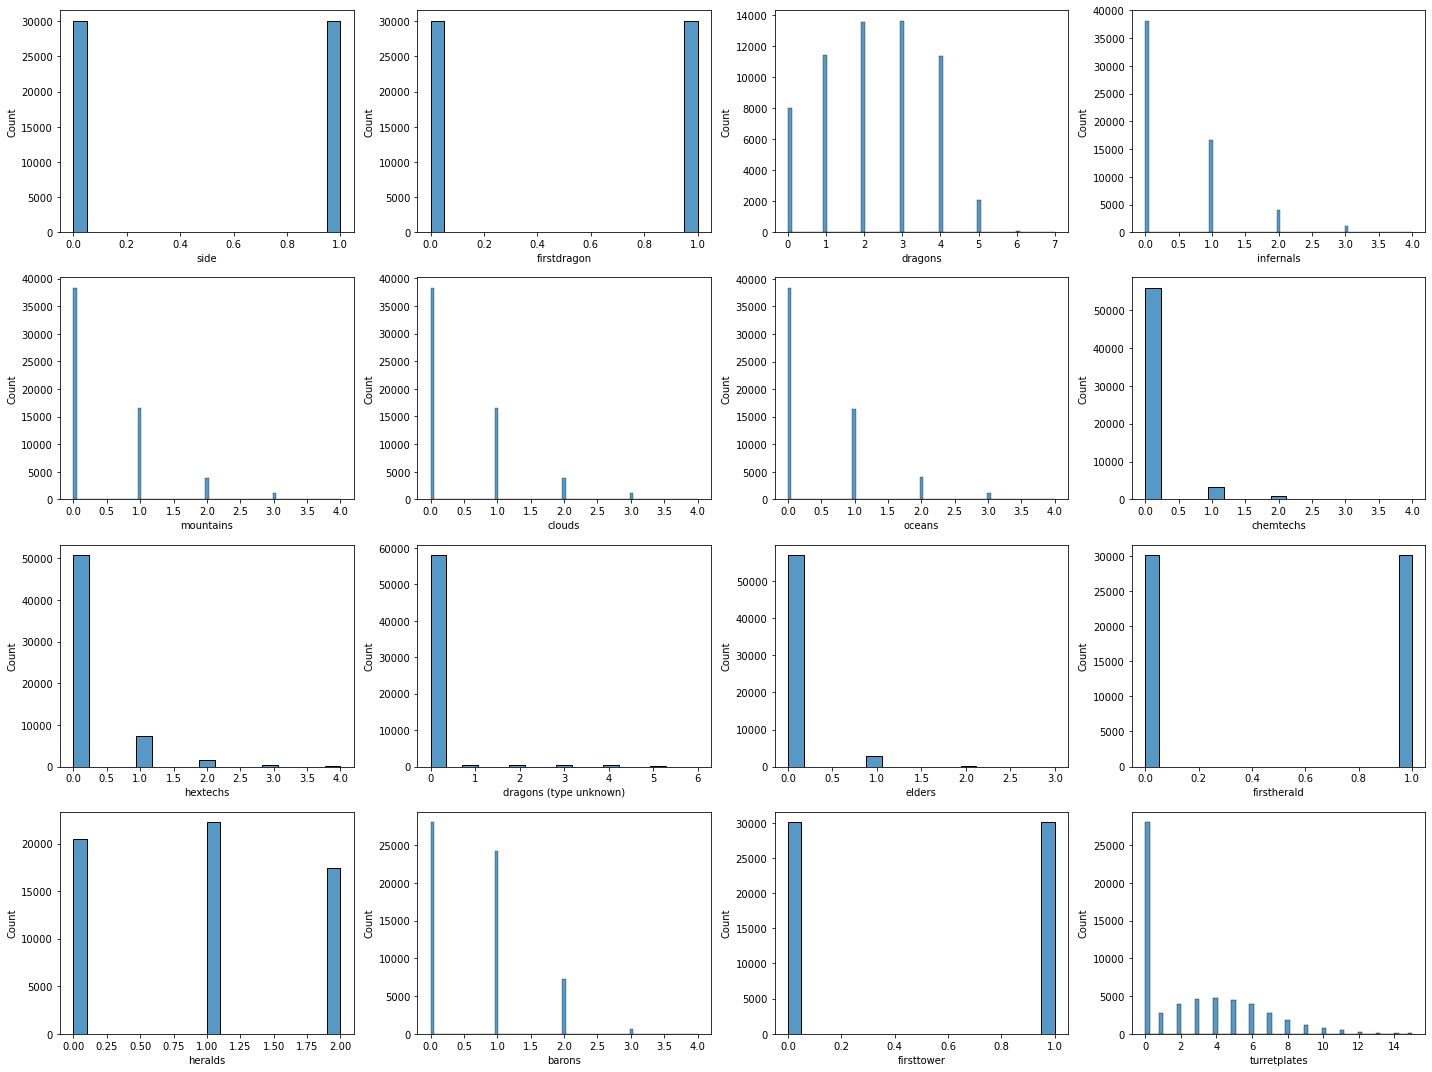

In [286]:
# visualize distribution of unscaled data in each feature
plot_num = 1

plt.subplots(4,4, figsize=(20,15))

for col in X:
    plt.subplot(4,4,plot_num)
    sns.histplot(X[col])
    plot_num +=1

plt.tight_layout()
plt.show()

---
We can see we do not have normal distribution anymore and we can say it looks pretty imbalance. There is gap between our data distribution and some are skew to left, therefore in this case we will choose MinMax scaler as it works better with non-normal distibution.

Also another reason why we chose MinMax Scaler is that it prevents certain features with large scales from washing out the impact of other features, which is very important in our case since we are simply going to compare different resources of the game and their impact on the flow of the game

---

In [287]:
### SCALING
# Instantiate
mm = MinMaxScaler()

# Fit - on the TRAINING DATA
mm.fit(X_rem)

# Transform - all the datasets
X_rem_mm = mm.transform(X_rem)
X_train_mm = mm.transform(X_train)
X_validation_mm = mm.transform(X_val)
X_test_mm = mm.transform(X_test)

In [288]:
# fit the model on scaled data
# 1.instantiate the model
Validated_logreg = LogisticRegression(random_state=1)

# 2. Fit the model
Validated_logreg.fit(X_train_mm, y_train)

# 3. Score the model
Validated_logreg_mm_train_acc = Validated_logreg.score(X_train_mm, y_train)
Validated_logreg_mm_val_acc = Validated_logreg.score(X_validation_mm,y_val)

print("---MinMax Scaler data---")
print(f"Training accuracy: {Validated_logreg_mm_train_acc}")
print(f"Validation accuracy: {Validated_logreg_mm_val_acc}")

---MinMax Scaler data---
Training accuracy: 0.8679679587514961
Validation accuracy: 0.8706143211164732


In [289]:
# Let's try a modest range of C values to optimize our model
c_values = [.00001, .0001, .001, .1, 1, 10, 100, 1000, 10000,100000]

# Set up empty lists
train_accuracies = []
validation_accuracies = []

# Iterate over the C values
for value in c_values:
    
    # Instantiate a log reg and fit to the train set
    logreg = LogisticRegression(C=value, random_state=1).fit(X_train_mm, y_train)
    
    # Score on the train set and append this accuracy to its respective list
    train_accuracies.append(logreg.score(X_train_mm, y_train))
    
    # Score on the validation set and append this accuracy to its respective list
    validation_accuracies.append(logreg.score(X_validation_mm, y_val))

In [290]:
pd.DataFrame({'C value': c_values, 'train accuracy': train_accuracies, 'validation accuracy': validation_accuracies})

,C value,train accuracy,validation accuracy
0,0.00001,0.715864,0.720099
1,0.00010,0.733956,0.738490
2,0.00100,0.813461,0.818443
3,0.10000,0.867439,0.870093
4,1.00000,0.867968,0.870614
5,10.00000,0.868083,0.870353
6,100.00000,0.868175,0.870484
7,1000.00000,0.868175,0.870484
8,10000.00000,0.868175,0.870484
9,100000.00000,0.868175,0.870484


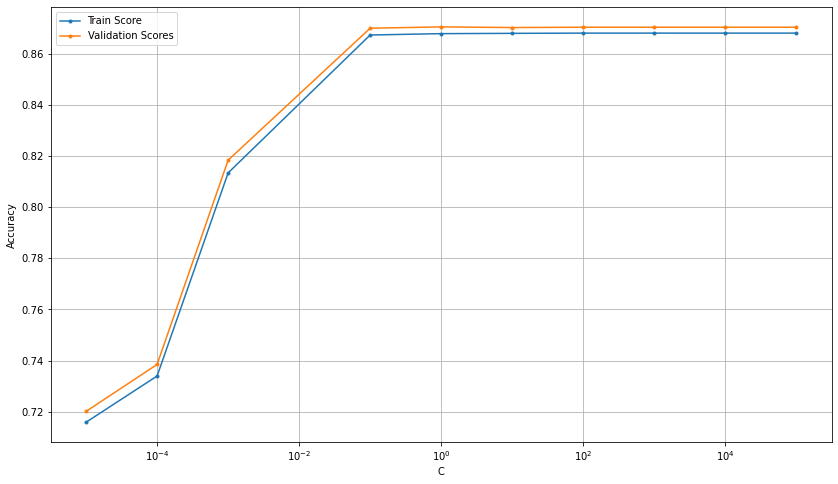

In [291]:
# plot the C values
plt.figure(figsize=(14,8))
plt.plot(c_values, train_accuracies,label="Train Score",marker='.')
plt.plot(c_values, validation_accuracies,label="Validation Scores",marker='.')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show();

---
For our C value here its really close between 1 and 10, but at C value = 10 we do have slight edge and if go back to above table we see slightly better performance and less gap between train and validation sets at `C Value=10`, Lets put this into our test and fit our final model for Logistic Regression;

---

In [294]:
# Final optimized model
# 1.instantiate the final  model
Validated_logreg = LogisticRegression(C=10, random_state=1)

# 2. Fit the model
Validated_logreg.fit(X_rem_mm, y_rem)

# 3. Score the model
Validated_logreg_opt_rem_acc_obj = Validated_logreg.score(X_rem_mm, y_rem)
Validated_logreg_opt_test_acc_obj = Validated_logreg.score(X_test_mm, y_test)

print("---Optimized data---")
print(f"Remainder st accuracy: {Validated_logreg_opt_rem_acc_obj}")
print(f"Test accuracy: {Validated_logreg_opt_test_acc_obj}")

---Optimized data---
Remainder st accuracy: 0.8685997143472051
Test accuracy: 0.8754988913525499


---
### Confusion Matrix

In [297]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Assuming Validated_logreg is your trained model, X_test_mm is your test data, and y_test is the true labels

# Get class predictions
y_pred = Validated_logreg.predict(X_test_mm)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Victory", "Defeat"],
    index=["True Victory", "True Defeat"]
)

display(cf_df)


,Victory,Defeat
True Victory,3868,642
True Defeat,481,4029


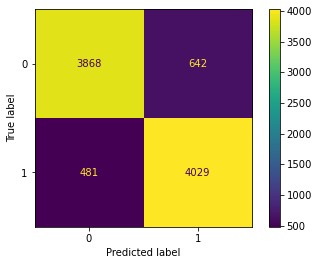

In [298]:
# the function expects the estimator, inputs and target as parameters
plot_confusion_matrix(Validated_logreg, X_test_mm, y_test);

Logistic Regresiion confusion matrix for our second question

* 3,868( ~85.37 %) games were correctly classified for games won,


* 4029(~89.3%) games were correctly classified for matches lost.

---
### Decession Tree

---
Lets try Decesion Tree model on our second dataframe that contain both Objectives and golds/EXP earned on first 15 mins.

---

In [299]:
# Instantiate the model 
DT_model = DecisionTreeClassifier(max_depth=1, random_state=1)

# Fit to the training data
DT_model.fit(X_rem, y_rem)

# Score the model
# Evaluate its classification accuracy 
print("---Unscaled data---")
print(f"Remainder accuracy:  {DT_model.score(X_rem, y_rem)}")
print(f"Test accuracy:  {DT_model.score(X_test,y_test)}")

---Unscaled data---
Remainder accuracy:  0.8492692375418207
Test accuracy:  0.8529933481152994


In [300]:
# Instantiate the model
DT_model = DecisionTreeClassifier(random_state=1)

# Fit to the training data
DT_model.fit(X_rem, y_rem)

# Score the model
DT_model_rem_unsc = DT_model.score(X_rem, y_rem)
DT_model_test_unsc = DT_model.score(X_test,y_test)
# Evaluate its classification accuracy 
print(f"Remainder accuracy :  {DT_model_rem_unsc}")
print(f"test accuracy :  {DT_model_test_unsc}")

Remainder accuracy :  0.9373716029817456
test accuracy :  0.8330376940133037


In [301]:
# how deep our tree would grow
DT_model.get_depth()

32

In [302]:
# finding best max_depth
OP = np.arange(1,32)
for depth in OP:

    # 1. Instantiate - DECISION STUMP
    DT_model = DecisionTreeClassifier(max_depth=depth)

    # 2. Fit
    DT_model.fit(X_train_mm, y_train)

    # 3. Score - on both train and test
    train_score = DT_model.score(X_train_mm, y_train)
    validation_score = DT_model.score(X_validation_mm, y_val)
    
    print(f'Max depth: {depth}, Train score:{train_score}, Validation score:{validation_score}')

Max depth: 1, Train score:0.8493002485958936, Validation score:0.8490935176731447
Max depth: 2, Train score:0.8570113249240402, Validation score:0.8590061301682536
Max depth: 3, Train score:0.8672774146027069, Validation score:0.8698317464458067
Max depth: 4, Train score:0.8686124666236995, Validation score:0.87022303378114
Max depth: 5, Train score:0.8730319491759506, Validation score:0.8747880526933611
Max depth: 6, Train score:0.8739066384310837, Validation score:0.8738750489109169
Max depth: 7, Train score:0.8760703434306233, Validation score:0.8750489109169166
Max depth: 8, Train score:0.8778427400791824, Validation score:0.8757010564758054
Max depth: 9, Train score:0.8810192431636129, Validation score:0.8729620451284726
Max depth: 10, Train score:0.8845180001841451, Validation score:0.8703534628929177
Max depth: 11, Train score:0.8890065371512752, Validation score:0.8707447502282509
Max depth: 12, Train score:0.8941395819906086, Validation score:0.8661797313160298
Max depth: 13, 

In [303]:


# A list of the maximum depths to try out and save to 'depths'
depths = range(1, int(np.sqrt(X_train_mm.shape[0])))



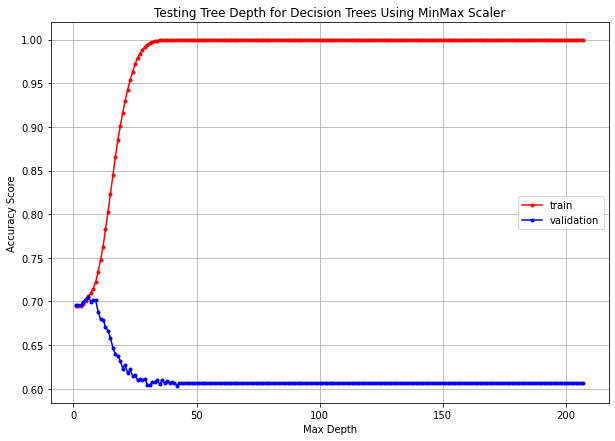

In [304]:
# Plotting the accuracies
plt.figure(figsize=(10, 7))
plt.plot(depths, train_acc, c='red', label='train', marker='.')
plt.plot(depths, val_acc, c='blue', label='validation', marker='.')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.title('Testing Tree Depth for Decision Trees Using MinMax Scaler')
plt.grid()
plt.legend()
plt.show()

---
 same as before As we can see after `Max_depth=6` we witnessing drop of our validation set, so we will choose `max_depth=6` to optimize our model.
 
 ---

In [305]:
# Instantiate the model 
DT_model = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit the model 
DT_model.fit(X_rem, y_rem)

# Store accuracy scores
DT_model_train = DT_model.score(X_rem, y_rem)
DT_model_test = DT_model.score(X_test, y_test)

# Score the model 
print("---Unscaled data---")
print(f"Train Accuracy: {DT_model_train}")
print(f"Test Accuracy: {DT_model_test}")

---Unscaled data---
Train Accuracy: 0.8740975523859834
Test Accuracy: 0.8793791574279379


In [306]:
# Instantiate the model 
DT_model = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit the model 
DT_model.fit(X_train,y_train)

# Store accuracy scores
DT_model_train = DT_model.score(X_train, y_train)
DT_model_test = DT_model.score(X_val, y_val)

# Score the model 
print(f"Train Accuracy: {DT_model_train}")
print(f"Validation Accuracy: {DT_model_test}")

Train Accuracy: 0.8739066384310837
Validation Accuracy: 0.8738750489109169


In [307]:
# Instantiate the model 
DT_model = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit the model 
DT_model.fit(X_train_mm,y_train)

# Store accuracy scores
DT_model_train_mm = DT_model.score(X_train_mm, y_train)
DT_model_val_mm = DT_model.score(X_validation_mm, y_val)

# Score the model 
print("---Standard Scaler data---")
print(f"Train Accuracy: {DT_model_train_mm}")
print(f"Test Accuracy: {DT_model_val_mm}")

---Standard Scaler data---
Train Accuracy: 0.8739066384310837
Test Accuracy: 0.8738750489109169


In [308]:
# Instantiate the model 
DT_model = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit the model 
DT_model.fit(X_rem_mm,y_rem)

# Store accuracy scores
DT_model_rem_opt = DT_model.score(X_rem_mm, y_rem)
DT_model_test_opt = DT_model.score(X_test_mm, y_test)

# Score the model 
print("---Optimized data---")
print(f"Train Accuracy: {DT_model_rem_opt}")
print(f"Test Accuracy: {DT_model_test_opt}")

---Optimized data---
Train Accuracy: 0.8740975523859834
Test Accuracy: 0.8793791574279379


---
## Confusion Matrix for Decesion Tree Model

In [309]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

# Get class predictions
y_pred = DT_model.predict(X_test_mm)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Victory", "Defeat"],
    index=["True Victory", " True Defeat"]
)

display(cf_df)

,Victory,Defeat
True Victory,3842,668
True Defeat,420,4090


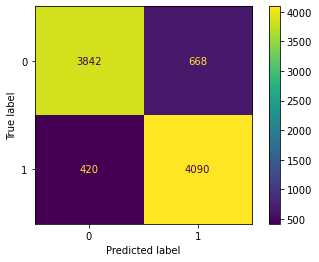

In [310]:
# the function expects the estimator, inputs and target as parameters
plot_confusion_matrix(DT_model, X_test_mm, y_test);

Decesion Tree confusion matrix for our second question

* 3,842( ~85.18 %) games were correctly classified for games won,


* 4,090(~90.68%) games were correctly classified for matches lost.

---
# XGBoosting

In [130]:
# Instantiate the model 
XGB_model = XGBClassifier(random_state=1)

# Fit the model 
XGB_model.fit(X_rem, y_rem)

# Store accuracy scores
XGB_model_rem_unsc_obj = XGB_model.score(X_rem, y_rem)
XGB_model_test_unsc_obj = XGB_model.score(X_test, y_test)

# Score the model 
print("---Unscaled data---")
print(f"Remainder Accuracy: {XGB_model_rem_unsc_obj}")
print(f"Test Accuracy: {XGB_model_test_unsc_obj}")

---Unscaled data---
Remainder Accuracy: 0.8855432294418031
Test Accuracy: 0.878159645232816


In [131]:
# Instantiate the model 
XGB_model = XGBClassifier(random_state=1)

# Fit the model 
XGB_model.fit(X_train, y_train)

# Store accuracy scores
XGB_model_train_unsc = XGB_model.score(X_train, y_train)
XGB_model_val_unsc = XGB_model.score(X_val, y_val)

# Score the model 
print("---Unscaled data---")
print(f"Train Accuracy: {XGB_model_train_unsc}")
print(f"Test Accuracy: {XGB_model_val_unsc}")

---Unscaled data---
Train Accuracy: 0.8861522880029463
Test Accuracy: 0.8773966349289162


In [132]:
# Instantiate the model 
XGB_model = XGBClassifier(random_state=1)

# Fit the model 
XGB_model.fit(X_train_mm, y_train)

# Store accuracy scores
XGB_model_train_mm_obj = XGB_model.score(X_train_mm, y_train)
XGB_model_val_mm_obj = XGB_model.score(X_validation_mm, y_val)

# Score the model 
print("---MinMax Scaler data---")
print(f"Train Accuracy: {XGB_model_train_mm_obj}")
print(f"Test Accuracy: {XGB_model_val_mm_obj}")

---MinMax Scaler data---
Train Accuracy: 0.8861522880029463
Test Accuracy: 0.8773966349289162


In [133]:
# Bulidng parameter and finding hyperparameter for our XGBoost
XGB_model = XGBClassifier(n_jobs=-1)

param_grid = {'n_estimators': np.arange(1, 200, 10), 'max_depth': np.arange(1, 10)}
grid_xgb = GridSearchCV(XGB_model, param_grid=param_grid, verbose=1, n_jobs=-1)

grid_xgb.fit(X_rem_mm, y_rem)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimator

In [134]:
grid_xgb.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [135]:
# we cast max_depth to str so that seaborn treats it like a category,
# which is better for visuals
results_df = pd.DataFrame({
    "n_estimators": grid_xgb.cv_results_["param_n_estimators"],
    'max_depth': grid_xgb.cv_results_["param_max_depth"].astype(str),
    'mean_score': grid_xgb.cv_results_["mean_test_score"]
})

results_df.head()

,n_estimators,max_depth,mean_score
0,1,1,0.849269
1,11,1,0.867093
2,21,1,0.868424
3,31,1,0.870145
4,41,1,0.870400


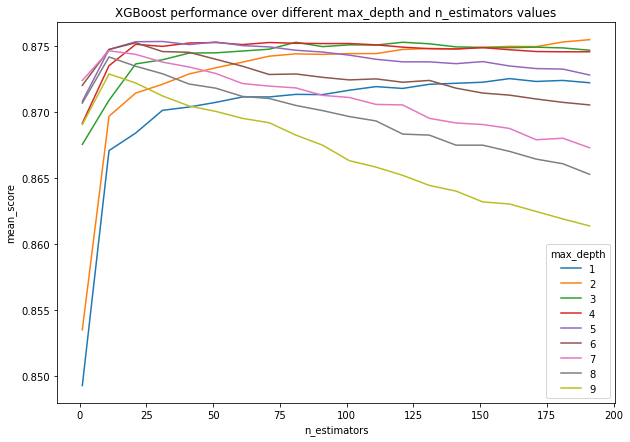

In [136]:
plt.figure(figsize=(10, 7))
sns.lineplot(x="n_estimators", y="mean_score", hue="max_depth", data=results_df)
plt.title("XGBoost performance over different max_depth and n_estimators values")
plt.show()

In [137]:
# Instantiate the model 
XGB_model = XGBClassifier(max_depth=3, random_state=1,)

# Fit the model 
XGB_model.fit(X_rem_mm, y_rem)

# Store accuracy scores
XGB_model_rem_opt_obj = XGB_model.score(X_rem_mm, y_rem)
XGB_model_test_opt_obj = XGB_model.score(X_test_mm, y_test)

# Score the model 
print("---Optimized data---")
print(f"Remainder Accuracy: {XGB_model_rem_opt_obj}")
print(f"Test Accuracy: {XGB_model_test_opt_obj}")

---Optimized data---
Remainder Accuracy: 0.8776975602120874
Test Accuracy: 0.8804878048780488


---
### Confusion Matrix for our XGBoost Model

In [138]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

# Get class predictions
y_pred = XGB_model.predict(X_test_mm)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Victory", "Defeat"],
    index=["True Victory", " True Defeat"]
)

display(cf_df)

,Victory,Defeat
True Victory,3818,692
True Defeat,386,4124


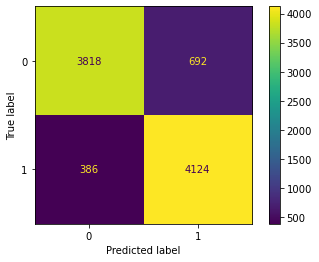

In [139]:
# the function expects the estimator, inputs and target as parameters
plot_confusion_matrix(XGB_model, X_test_mm, y_test);

XGBoost confusion matrix for our second question

* 3,818( ~84.60 %) games were correctly classified for games won,


* 4124(~90.56%) games were correctly classified for matches lost.

---
## Side Feature

---
As mentioned ealier in the report we have two sides within the game's nao, Blue side and Red side. During our analysis we came across very intresting points, based on the result below we found in our data that the Blue side tends to win more games compared to the Red side. 

First of, we will examine the numbers and plot the results, then we will go more into details;

---

In [140]:
# Total wins and loses in each side
lol_df['side'].value_counts()

1    30068
0    30063
Name: side, dtype: int64

In [141]:
# Total win breakdown based on the side
blue_side = lol_df.loc[lol_df['result'] == 1, ['side','result']].value_counts()
blue_side

side  result
1     1         15873
0     1         14193
dtype: int64

In [142]:
# Total lsoe breakdown based on the side
red_side = lol_df.loc[lol_df['result'] == 0, ['side','result']].value_counts()
red_side

side  result
0     0         15870
1     0         14195
dtype: int64

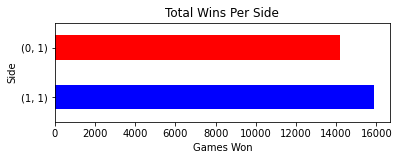

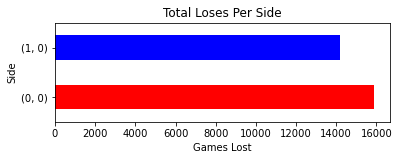

In [143]:

# Plot for wins per side
plt.subplot(2, 1, 1)
blue_side.plot(kind ='barh',color=("blue", "red"))
plt.title('Total Wins Per Side')
plt.xlabel('Games Won')
plt.ylabel('Side')
plt.show()

plt.subplot(2, 1, 2)
red_side.plot(kind ='barh',color=("red","blue"))
plt.title('Total Loses Per Side')
plt.xlabel('Games Lost')
plt.ylabel('Side')
plt.show()


---
Now that we have plot the wins and loses per side, we can have better understanding and clear vision on why and how the Blue side's performance tends to be better. 

| side | Games Won | Games Lost | Win Percentage | Lose Percentage |
| - | - | - | - | - |
| Blue | 15,873 | 14,195 | 52.61% | 47.38% |
| Red | 14,193 | 15,870 |47.38% | 52.61% |


Aaccording to our data and the above graphs, we can confidently say that Blue side has more advantages, why? one of the reasons we concluded is that the layout of the map is different, and results easier to gank top side from blue side than red side. If you are in the red team and you would like to do the same thing, you'd need to go to blue side jungle and that is the big risk to take. Another reason is that on blue side you do have easier access to dragons which is a very important early game resource for the team. Lastly, another advantage of blue side is you always have the first champion pick, therefore the blue side can pick strongest champion in this patch, which ultimately works on their benefit.



---

---
## Players Kills and Assists 

In [144]:
# Sum of the stats for winning team
Winner = lol_df.loc[lol_df['result'] == 1, ['kills','assists']]
Winner.sum()

kills       587564
assists    1341291
dtype: int64

In [145]:
# Sum of the stats for losing team
Loser = lol_df.loc[lol_df['result'] == 0, ['kills','assists']]
Loser.sum()

kills      280093
assists    602915
dtype: int64

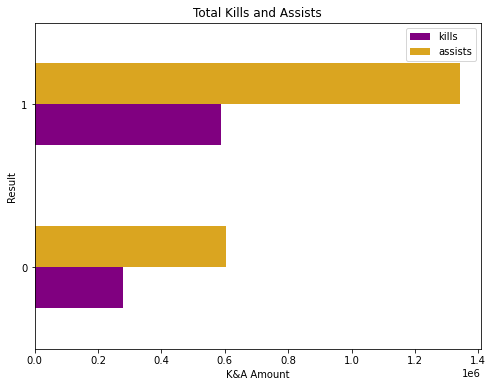

In [146]:
# plot stats for both team
df = lol_df.groupby(['result'])['kills','assists'].sum(['kills','assists','result'])
df.plot(kind ='barh',color=("purple", "goldenrod"))
plt.title('Total Kills and Assists')
plt.xlabel('K&A Amount')
plt.ylabel('Result')
plt.gcf().set_size_inches(8, 6) 
plt.show()

---
Wow such a impressive results, we were not excpecting to see such high numbers in assist for winning team, we were actually expecting number of kills to be higher.

| Result | Kills | Assists |
| - | - | - |
| Victory | 587,564 | 1,341,291 |
| Defeat | 280,093 | 602,915 |

This lead us to conclude that it does makes sense to have an assistant for their teammates within a game, and this would result (in addition to killing the opponent) in gold, that would be received by the teammate who helped to execute the plan.


---

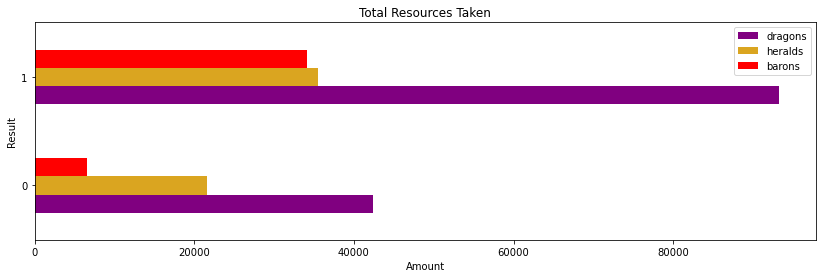

In [147]:
# Plotting total resources taken for each result
df = lol_df.groupby(['result'])['dragons', 'heralds', 'barons'].sum()
ax = df.plot(kind='barh', color=("purple", "goldenrod", "red"))
plt.title('Total Resources Taken')
plt.xlabel('Amount')
plt.ylabel('Result')



plt.gcf().set_size_inches(14, 4) 
plt.show()


---
## Dragons


as previously mentioned, there are 5 types of dragons or drakes Clouds, Hextech, Infernal, Mountain and Ocean drakes. First dragon spawns 5 minutes after the game starts; after the dragn is slained 5 minutes later another will respawn, once one of the two team slains 4 dragons, Elder Dragon will spawn next which is one the strongest buff in the game and once taken it kind of make it nearly impossible to fight the team who has it. This buffs gives the ability of excuting opponest that has less than 25% of their tottal health.

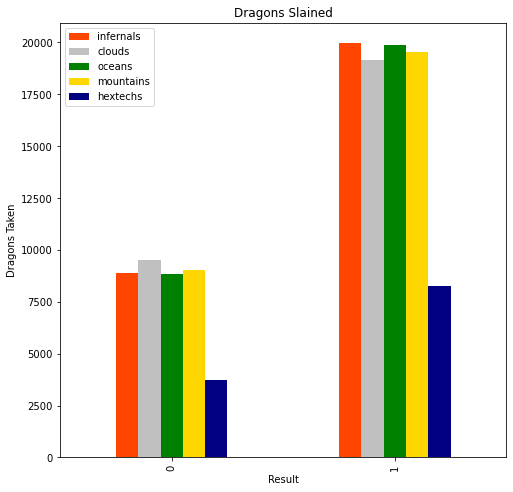

In [148]:
# Plot the dragons type
df_dragons = lol_df.groupby(['result'])['infernals','clouds','oceans','mountains',
                                        'hextechs'].sum(['infernals','clouds','oceans','mountains','hextechs','result'])
df_dragons.plot(kind ='bar',color=("orangered","silver","green","gold","navy"))
plt.title('Dragons Slained')
plt.xlabel('Result')
plt.ylabel('Dragons Taken')
plt.gcf().set_size_inches(8, 8) 
plt.show()

<Figure size 720x432 with 0 Axes>

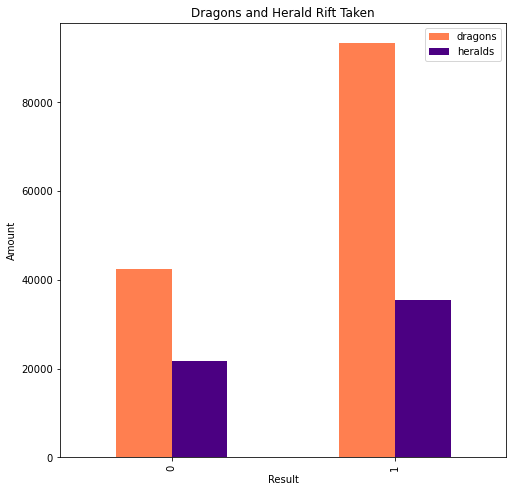

In [149]:
# Plot Dragons vs Rift Herald
plt.figure(figsize=(10, 6))  # Adjust width and height as needed
df = lol_df.groupby(['result'])['dragons', 'heralds'].sum(['dragons', 'heralds', 'result'])
ax = df.plot(kind='bar', color=("coral", "indigo"))
plt.title('Dragons and Herald Rift Taken')
plt.xlabel('Result')
plt.ylabel('Amount')
plt.gcf().set_size_inches(8, 8)  
plt.show()


---
The above graph shows a perfect distribution of the amount dragons slained between the winning and the losing teams. We can confidently say how importat this feature is based on amount of dragons winner team has slained, and we can see Infernal and Ocean are more dominant compared to the other three (3). 

---

---
# Barons & Elder Dragon

---
This one is the tough point, as both are important and strogest buffs in the game. We will plot them and see the results so we can talk about this more in detail.

---

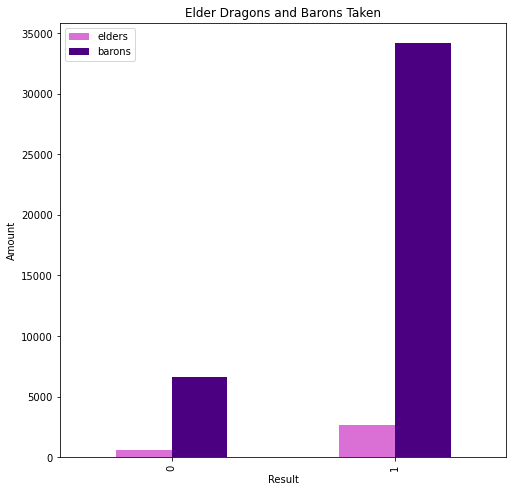

In [150]:
# Plot the result for barons and elder dragon
BaEd_df = lol_df.groupby(['result'])['elders','barons'].sum(['elders','barons','result'])
BaEd_df.plot(kind ='bar', color=("orchid","indigo"))
plt.title('Elder Dragons and Barons Taken')
plt.xlabel('Result')
plt.ylabel('Amount')
plt.gcf().set_size_inches(8, 8) 
plt.show()

---
Well, we can see that the amount of barons taken by the winner team is, by far, more than Elder dragon. This result makes sense and is somewhat unfair for us to run this compare of these two, as baron spawn at 20 minutes into game, but elder dragon only spawn once one of the two team have slained 4 dragon. 

---

---
**Summarizing our model performances**

In [311]:
unscaled = [base_logreg_unsc_rem,DT_model_rem_unscb,XGB_model_rem_unsc,OBJ_rem_unsc,DT_model_rem_unsc,XGB_model_rem_unsc_obj]
standard_MinMax = [Validated_logreg_ss_train_acc,DT_model_train_ss,XGB_model_train_ss,Validated_logreg_mm_train_acc,DT_model_train_mm,XGB_model_train_mm_obj]
optimazed = [Validated_logreg_opt_rem_acc,DT_model_rem_optg,XGB_model_rem_opt,Validated_logreg_opt_rem_acc_obj,DT_model_rem_opt,XGB_model_rem_opt_obj]

unscaled_t = [base_logreg_unsc_test,DT_model_test_unscb,XGB_model_test_unsc,OBJ_test_unsc,DT_model_test_unsc,XGB_model_test_unsc_obj]
standard_t = [Validated_logreg_ss_train_acc,DT_model_test_ss,XGB_model_val_ss,Validated_logreg_mm_val_acc,DT_model_val_mm,XGB_model_val_mm_obj]
optimazed_t = [Validated_logreg_opt_test_acc,DT_model_test_optg,XGB_model_test_opt,Validated_logreg_opt_test_acc_obj,DT_model_test_opt,XGB_model_test_opt_obj]

rows = ['Logistic Regression Gold/EXP@15min', 'Decision Tree Classifier Gold/EXP@15min','XGBoost Gold/EXP@15min','Logistic Regression OBJ','Decision Tree Classifier OBJ','XGBoost OBJ']

model_summary = pd.DataFrame(list(zip(unscaled, standard_MinMax, optimazed, unscaled_t, standard_t, optimazed_t)),
                             index=rows,
                             columns=pd.MultiIndex.from_product([['TRAIN DATA','TEST DATA'],
                                                                 ['Unscaled data', 'Scaled data','Optimized data']]))

model_summary

TRAIN DATA              \
                                        Unscaled data Scaled data   
Logistic Regression Gold/EXP@15min           0.653636    0.705575   
Decision Tree Classifier Gold/EXP@15min      0.694312    0.706012   
XGBoost Gold/EXP@15min                       0.765276    0.771660   
Logistic Regression OBJ                      0.868561    0.867968   
Decision Tree Classifier OBJ                 0.937372    0.873907   
XGBoost OBJ                                  0.885543    0.886152   

                                                           TEST DATA  \
                                        Optimized data Unscaled data   
Logistic Regression Gold/EXP@15min            0.705386      0.654545   
Decision Tree Classifier Gold/EXP@15min       0.706208      0.697672   
XGBoost Gold/EXP@15min                        0.708752      0.694789   
Logistic Regression OBJ                       0.868600      0.875499   
Decision Tree Classifier OBJ                  0.874098      0.833038   
XGBoost OBJ                                   0.877698      0.878160   

                                                                    
                                        Scaled data Optimized data  
Logistic Regression Gold/EXP@15min         0.705575       0.704545  
Decision Tree Classifier Gold/EXP@15min    0.705100       0.701220  
XGBoost Gold/EXP@15min                     0.701317       0.707539  
Logistic Regression OBJ                    0.870614       0.875499  
Decision Tree Classifier OBJ               0.873875       0.879379  
XGBoost OBJ                                0.877397       0.880488

---
### Summary Of Our Report

We have included Train and Test accuracy of all our models in the above table, let's also include the result of confusion matrix per model as well so we can go see them all in one picture and figure out which model performed well.

Results of the confusion matrixes for our 2 primery problems are as shown below:

1. Can we predict the result of the game within the first 15 minutes based on the amount of gold and XP earned by the team? 


2. How are the secondary objectives able to alter the dynamic of a game and change the potential game result?

**Logistic Regression Gold/EXP@15min**

* 3,214( ~71.2 %) games were correctly classified for games won


* 3,141(~69%) games were correctly classified for matches lost.

**Decision Tree Classifier Gold/EXP@15min**

* 3,385( ~75.05 %) games were correctly classified for games won


* 2,940(~65.18%) games were correctly classified for matches lost.

**XGBoost Gold/EXP@15min**	

* 3,260( ~72.2 %) games were correctly classified for games won

* 3,116(~69%) games were correctly classified for matches lost 

**Logistic Regression OBJ**

* 3,868( ~85.37 %) games were correctly classified for games won,


* 4,029(~89.33%) games were correctly classified for matches lost.

**Decision Tree Classifier OBJ**

* 3,842( ~85.18 %) games were correctly classified for games won,

* 4,090(~90.68%) games were correctly classified for matches lost.

**XGBoost OBJ**

* 3,818( ~84.60 %) games were correctly classified for games won,


* 4,124(~90.56%) games were correctly classified for matches lost.


Now that we have our numbers summarized, we will proceed to conclude. 








---
## **Conclusion**

---
In summary, 

 we conclude with the following comparison of the models' performance with respect to the data given. For our first primary problem, the test accuracy for optimized data varied from ~69.9 to ~70%; however, once we evaluated our models, Logistic Regression and XGBoost performed better compared to Decesion Tree, and is my observation that Logistic Regression outshines XGBoost in this case, with a slightly more accurate result. 

Following the second question within our project, our models demonstrate that XGBoost has better train and test accuracy, in comparison to the other two models. With respect to the evaluation, it also performs better than the other two models with nearly ~86 and ~ 88% correctly classified matches for wins and loses respectively. 

As we were able to choose and find which model performs better in each problem stated, we can narrow down other remarkable details that are essential to our report. 

- Such as how the blue side is more important than the red side and has higher win percentage


- Importance of dragons and the correlation they have toward winning


- Importance of assists and amount of gold it can bring to your teammates

---